<a id='introduction'></a>
# Introduction


This Colab notebook serves as an introduction to the intriguing realm of scorecard creation in the context of loan origination. It delves into the art of utilizing diverse datasets, including one that draws inspiration from 'Sach,' setting itself apart from the more conventional sources like Kaggle and UCI. The central objective of this notebook revolves around the meticulous identification of a robust machine learning algorithm, meticulously tailored for the precise construction of a dependable scorecard model.

Noteworthy is the methodology embraced, which hinges upon the strategic deployment of a multitude of datasets. This careful approach aims to extract the optimal performance potential of the chosen algorithm. Furthermore, a significant aspect of this exploration is the intricate process of establishing the score grid. This endeavor invariably demands the application of logistic regression, a pivotal technique that finds its roots within the realm of linear modeling. Through these combined efforts, this notebook embarks on a journey to unravel the nuanced art and science behind scorecard development.

# Import the necessary libraries

In [ ]:
from function import *

# Upload data

In [ ]:
file_path_german = '/content/german.data'
file_path_taiwan = '/content/default of credit card clients.xls'
file_path_BDM = '/content/bank-full.csv'
file_path_AER = '/content/AER_credit_card_data.csv'
# Read the .data file into a pandas DataFrame
german = pd.read_csv(file_path_german, sep='\s+', header=None)
taiwan = pd.read_excel(file_path_taiwan, header=1)
BDM = pd.read_csv(file_path_BDM, sep=';')
AER = pd.read_csv(file_path_AER, sep=',')

In [ ]:
GMSC.head(2)

Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0           1                 1                              0.766127   45   
1           2                 0                              0.957151   40   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     2   0.802982         9120.0   
1                                     0   0.121876         2600.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                               13                        0   
1                                4                        0   

   NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
0                             6                                     0   
1                             0                                     0   

   NumberOfDependents  
0                 2.0  
1                 1.0

# Data understand

In credit risk assessment, a comprehensive understanding of our variables is crucial. Seeking guidance from a risk expert for variable selection—prior to employing statistical algorithms for feature selection—has the potential to significantly enhance model performance

## UCI- German Credit Data

In [ ]:
german.head(2)

0   1    2    3     4    5    6   7    8     9   ...    11  12    13  \
0  A11   6  A34  A43  1169  A65  A75   4  A93  A101  ...  A121  67  A143   
1  A12  48  A32  A43  5951  A61  A73   2  A92  A101  ...  A121  22  A143   

     14 15    16 17    18    19 20  
0  A152  2  A173  1  A192  A201  1  
1  A152  1  A173  1  A191  A201  2  

[2 rows x 21 columns]

Description of the German credit dataset.

* Attribute 1:  (qualitative) Status of existing checking account
* Attribute 2:  (numerical) Duration in month
* Attribute 3:  (qualitative) Credit history
* Attribute 4:  (qualitative) Purpose
* Attribute 5:  (numerical) Credit amount
* Attibute 6:  (qualitative) Savings account/bonds
* Attribute 7:  (qualitative) Present employment since
* Attribute 8:  (numerical) Installment rate in percentage of disposable income
* Attribute 9:  (qualitative) Personal status and sex
* Attribute 10: (qualitative) Other debtors / guarantors
* Attribute 11: (numerical) Present residence since
* Attribute 12: (qualitative) Property
* Attribute 13: (numerical) Age in years
* Attribute 14: (qualitative) Other installment plans
* Attribute 15: (qualitative) Housing
* Attribute 16: (numerical) Number of existing credits at this bank
* Attribute 17: (qualitative) Job
* Attribute 18: (numerical) Number of people being liable to provide maintenance for
* Attribute 19: (qualitative) Telephone
* Attribute 20: (qualitative) foreign worker
* Attribute 21: target (1 = Good,  2 = Bad)

The variables of significance are : Duration in month (Att2); Purpose (Att4); Credit amount (Att5); Present employment since (Att7); Installment rate (Att8); Personal status and sex (Att9); guarantors (Att10); Age (Att13); Housing (Att15) ; Job (Att17); foreign worker (Att20).

Conversely, there exist highly relevant variables that fall within the scope of a behavioral scorecard framework. For instance : Status of existing checking account ; Credit history;Savings account/bonds; Number of existing credits at this bank


In [ ]:
# Select specific columns
selected_columns = [1, 3, 4, 6, 7, 8, 9, 12, 14, 16, 19, 20]
new_german = german.iloc[:, selected_columns]

# Create a dictionary to map old column names to new column names
column_name_mapping = {
    1:'duration',
    3:'purpose',
    4:'amount',
    6:'employment',
    7:'installment',
    8:'status',
    9:'guarantors',
    12:'age',
    14:'housing',
    16:'job',
    19:'worker',
    20:'target'
    # Add more mappings as needed
}

# Rename the columns
new_german.rename(columns=column_name_mapping, inplace=True)
# Create a mapping dictionary
mapping = {1: 'good', 2: 'bad'}
# Use the map function to replace values in the 'target' column
new_german['target'] = new_german['target'].map(mapping)

new_german.head(2)

<ipython-input-24-f316e84743aa>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_german.rename(columns=column_name_mapping, inplace=True)
<ipython-input-24-f316e84743aa>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_german['target'] = new_german['target'].map(mapping)


duration purpose  amount employment  installment status guarantors  age  \
0         6     A43    1169        A75            4    A93       A101   67   
1        48     A43    5951        A73            2    A92       A101   22   

  housing   job worker target  
0    A152  A173   A201   good  
1    A152  A173   A201    bad

In [ ]:
# get column types
qualitative_list, quantitative_list = get_column_types(new_german)
print("Qualitative Columns:", qualitative_list)
print("Quantitative Columns:", quantitative_list)


Qualitative Columns: ['purpose', 'employment', 'status', 'guarantors', 'housing', 'job', 'worker', 'target']
Quantitative Columns: ['duration', 'amount', 'installment', 'age']


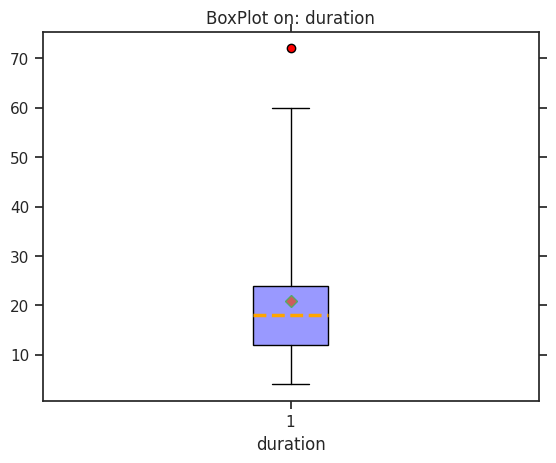

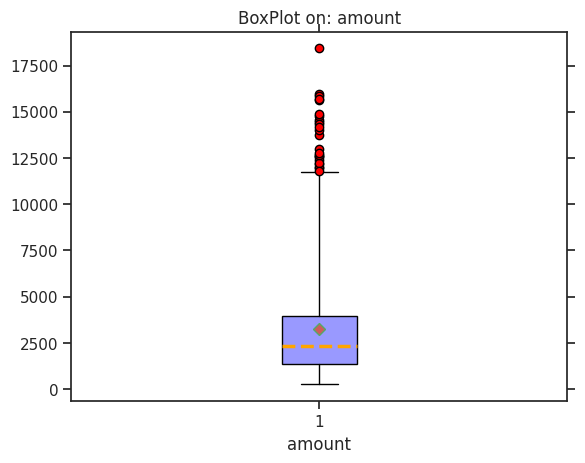

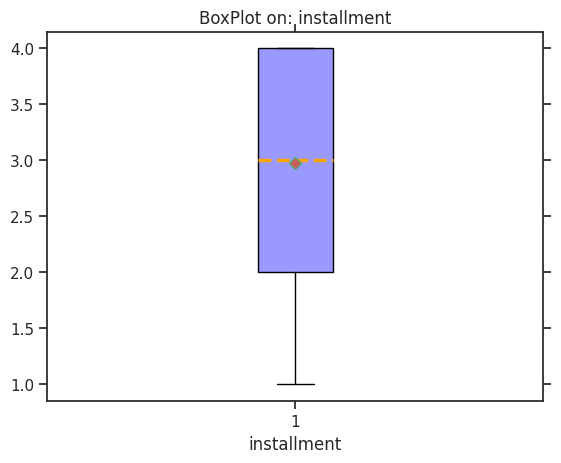

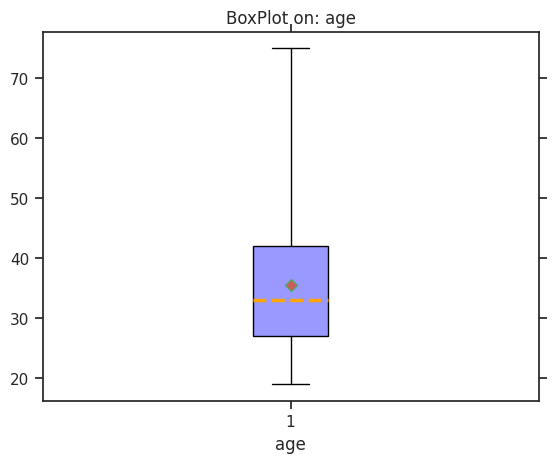

In [ ]:
# Boxplot for quantitative data
custom_boxplot(new_german, quantitative_list)


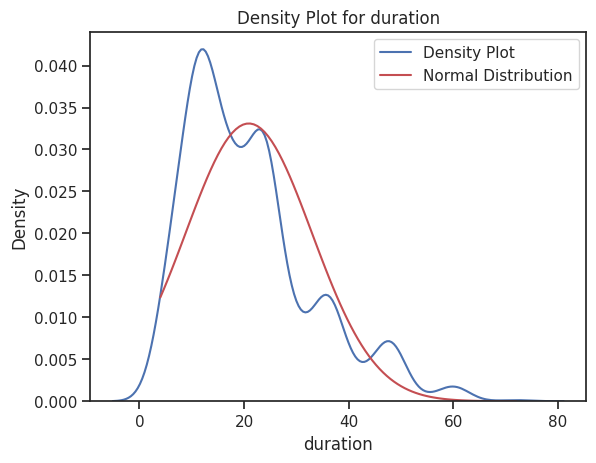

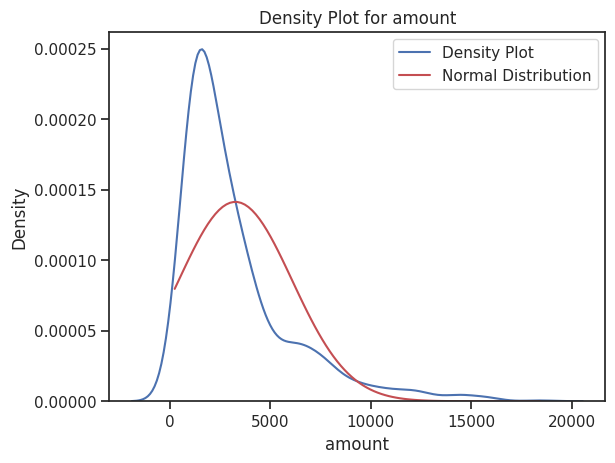

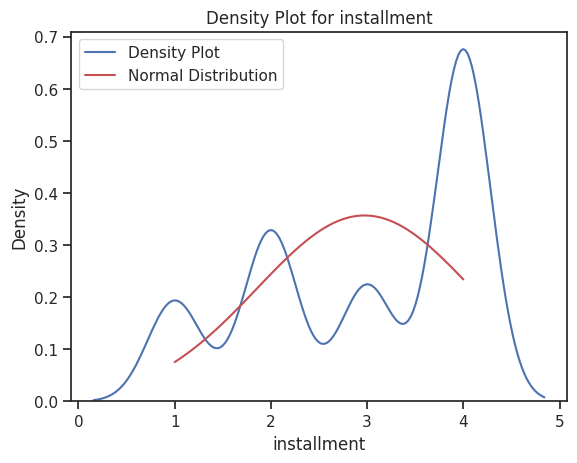

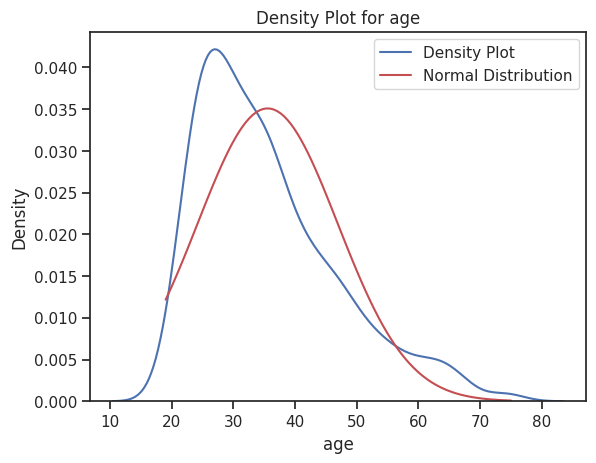

In [ ]:
# Density for quantitative data vs. normal distribution
plot_density_with_normal(new_german[quantitative_list])


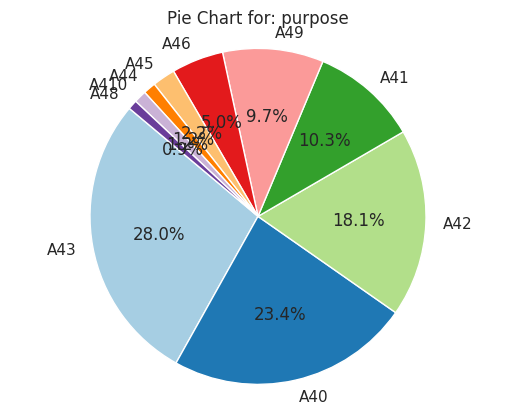

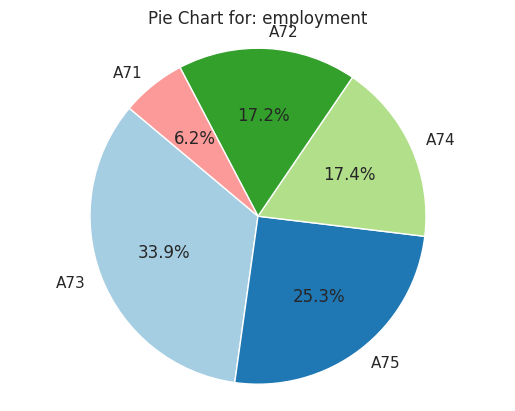

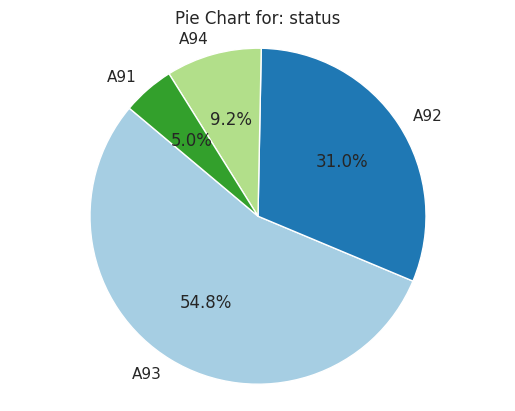

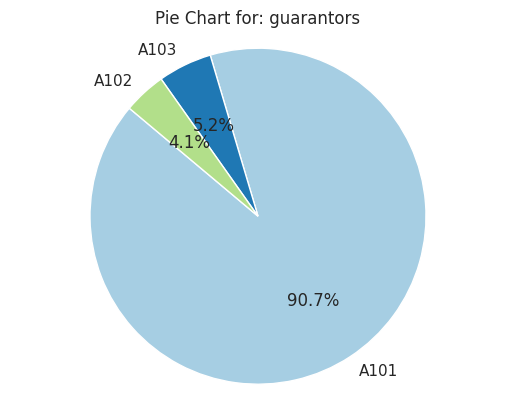

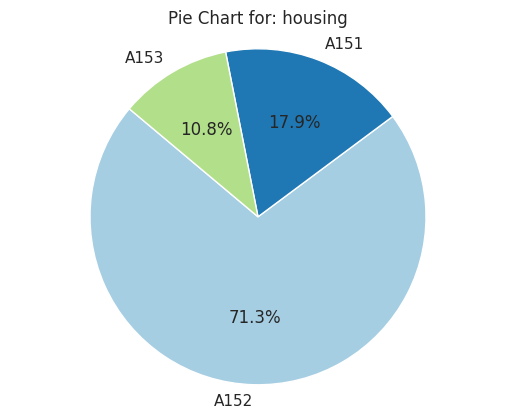

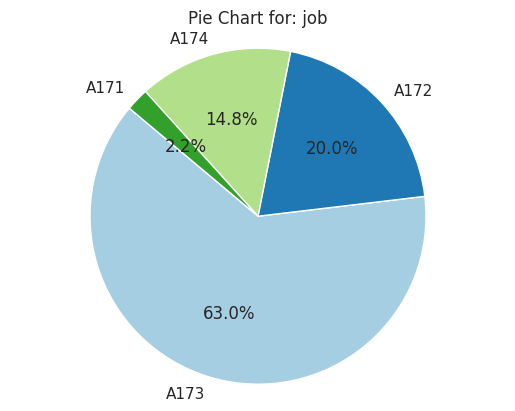

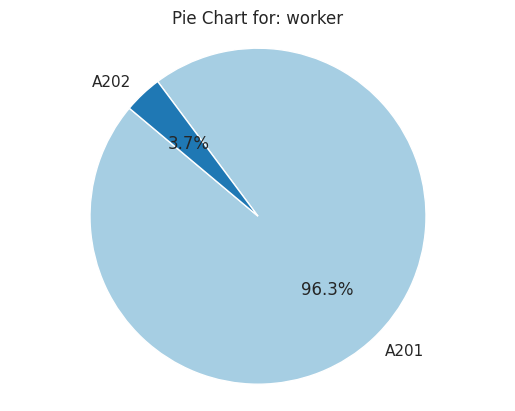

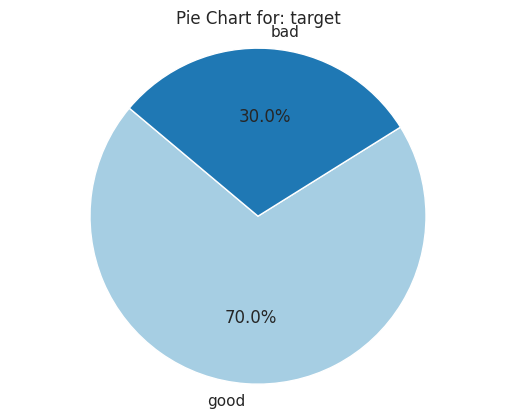

In [ ]:
# Pie char for qualitative variables
custom_pieplot(new_german, qualitative_list)

In [ ]:
print('The number of default clients?\n',
      new_german['target'].value_counts())
print('The pourcentage of default clients?\n',
      new_german['target'].value_counts(normalize=True))

The number of default clients?
 good    700
bad     300
Name: target, dtype: int64
The pourcentage of default clients?
 good    0.7
bad     0.3
Name: target, dtype: float64


## UCI - default of credit card (taiwan)

In [ ]:
taiwan.head(2)

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  

[2 rows x 25 columns]

The payment data in October, 2005, from an important bank (a cash and credit card issuer) in Taiwan, the following 23 variables as explanatory variables:
* LIMIT_BAL: Amount of the given credit (NT dollar): it includes
both the individual consumer credit and his/her family (supplementary) credit.
* SEX: Gender (1 = male; 2 = female).
* EDUCATION: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* MARIAGE: Marital status (1 = married; 2 = single; 3 = others).
* AGE: Age (year).
* PAY_0-6: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: PAY_0 = the repayment status in September, 2005; PAY_1 = the repayment status in August, 2005; . . .; PAY_6 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* BILL_AMT_1-6: Amount of bill statement (NT dollar). BILL_AMT_1 = amount of bill statement in September, 2005;
BILL_AMT_2 = amount of bill statement in August, 2005; . . .; BILL_AMT_6 = amount of bill statement in April, 2005.
* PAY_AMT_1-6: Amount of previous payment (NT dollar). PAY_AMT_1 = amount paid in September, 2005; PAY_AMT_2 = amount paid in August, 2005; . . .; PAY_AMT_6 = amount paid in April, 2005

*** Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert systems with applications, 36(2), 2473-2480.

In [ ]:
# Select specific columns
selected_columns = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'default payment next month']
new_taiwan = taiwan.loc[:, selected_columns]
# Create a dictionary to map old column names to new column names
column_name_mapping = {
    'LIMIT_BAL':'amount',
    'SEX':'gender',
    'MARRIAGE':'status',
    'AGE':'age',
    'EDUCATION':'education',
    'default payment next month':'target'
    # Add more mappings as needed
}

# Rename the columns
new_taiwan.rename(columns=column_name_mapping, inplace=True)
# Create a mapping dictionary
mapping_target = {1: 'bad', 0: 'good'}
mapping_sex = {1: 'male', 2: 'female'}
mapping_edu = {1:'graduate school', 2:'university', 3:'high school', 4:'others'}
mapping_stat = {1:'married', 2:'single', 3:'others'}
# Use the map function to replace values in the 'target' column
new_taiwan['target'] = new_taiwan['target'].map(mapping_target)
new_taiwan['gender'] = new_taiwan['gender'].map(mapping_sex)
new_taiwan['education'] = new_taiwan['education'].map(mapping_edu)
new_taiwan['status'] = new_taiwan['status'].map(mapping_stat)

new_taiwan.head(2)

amount  gender   education   status  age target
0   20000  female  university  married   24    bad
1  120000  female  university   single   26    bad

In [ ]:
# get column types
qualitative_list_taiwan, quantitative_list_taiwan = get_column_types(new_taiwan)
print("Qualitative Columns:", qualitative_list_taiwan)
print("Quantitative Columns:", quantitative_list_taiwan)

Qualitative Columns: ['gender', 'education', 'status', 'target']
Quantitative Columns: ['amount', 'age']


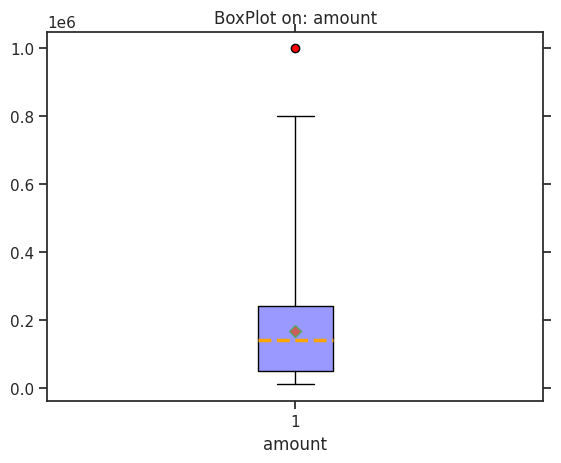

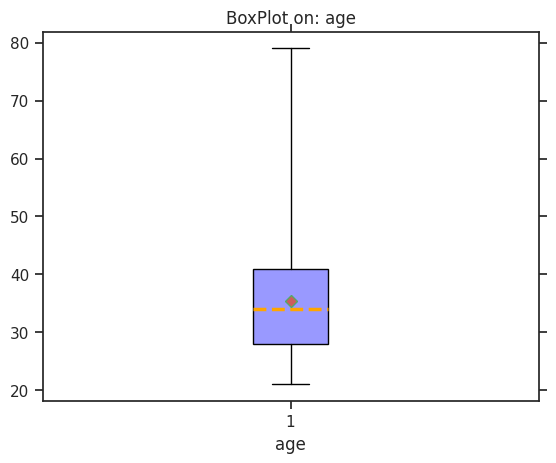

In [ ]:
# Boxplot for quantitative data
custom_boxplot(new_taiwan, quantitative_list_taiwan)

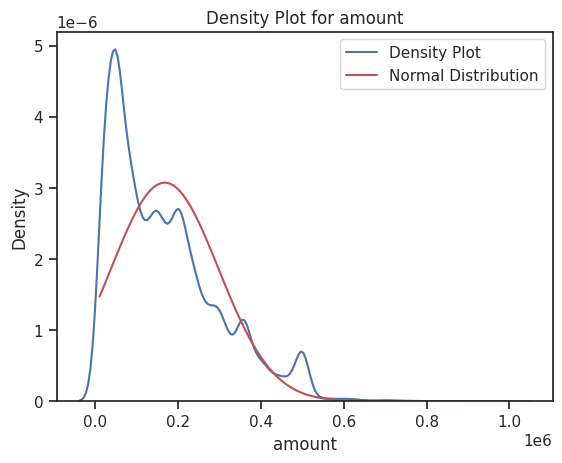

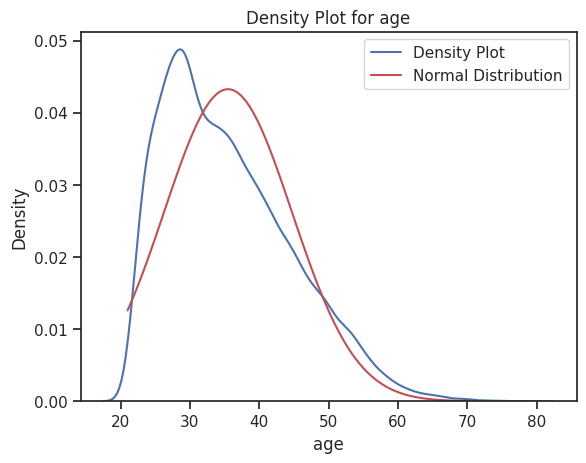

In [ ]:
# Density for quantitative data vs. normal distribution
plot_density_with_normal(new_taiwan[quantitative_list_taiwan])

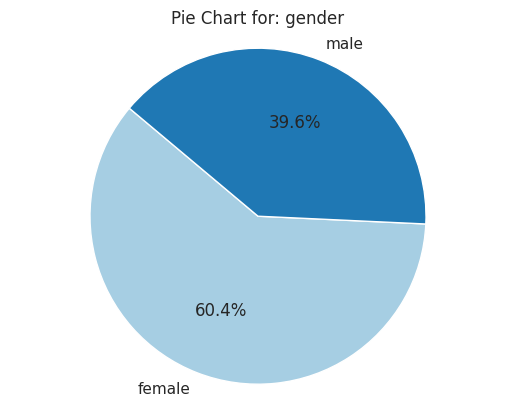

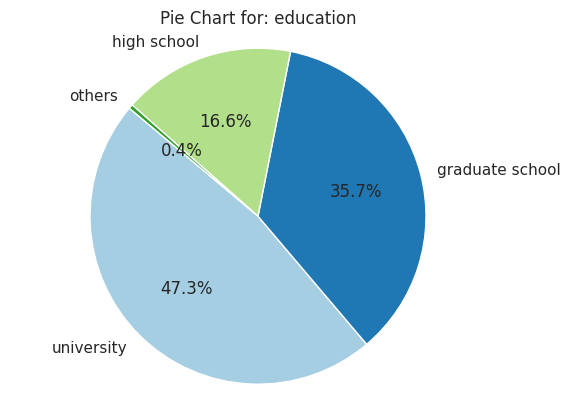

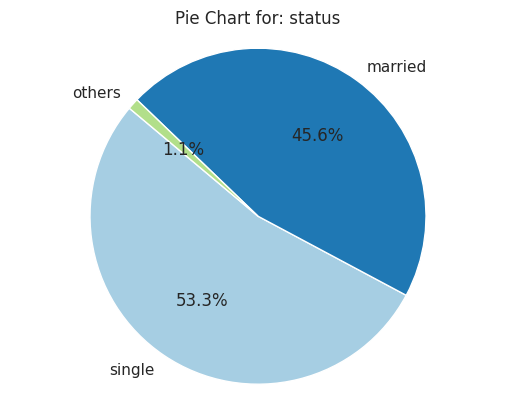

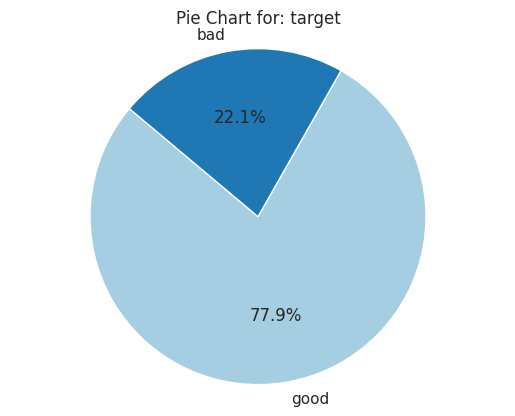

In [ ]:
# Pie char for qualitative variables
custom_pieplot(new_taiwan, qualitative_list_taiwan)

## Kaggle- Bank Direct Marketing

In [ ]:
BDM.head(2)

age         job  marital  education default  balance housing loan  contact  \
0   58  management  married   tertiary      no     2143     yes   no  unknown   
1   44  technician   single  secondary      no       29     yes   no  unknown   

   day month  duration  campaign  pdays  previous poutcome   y  
0    5   may       261         1     -1         0  unknown  no  
1    5   may       151         1     -1         0  unknown  no

The full dataset was described and analyzed in [Moro et al., 2011]. The data is related with direct marketing campaigns of a Portuguese banking institution. The datasets use is "bank-full" with all examples, ordered by date (from May 2008 to November 2010).

Attribute information:
* age (numeric)
* job : type of job (categorical: "admin.","unknown", "unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician", "services")
* marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
* education (categorical: "unknown","secondary","primary","tertiary")
* default: has credit in default? (binary: "yes","no")
* balance: average yearly balance, in euros (numeric)
* housing: has housing loan? (binary: "yes","no")
* loan: has personal loan? (binary: "yes","no")
* contact: contact communication type (categorical: "unknown","telephone","cellular")
* day: last contact day of the month (numeric)
* month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
* duration: last contact duration, in seconds (numeric)
* campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
* previous: number of contacts performed before this campaign and for this client (numeric)
* poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
* y - has the client subscribed a term deposit? (binary: "yes","no")

  *** [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology.

In [ ]:
# Select specific columns
selected_columns = ['age', 'job', 'marital', 'education', 'housing', 'loan', 'poutcome', 'y']
new_BDM = BDM.loc[:, selected_columns]
# Create a dictionary to map old column names to new column names
column_name_mapping = {
    'loan':'amount',
    'housing':'housing',
    'marital':'status',
    'age':'age',
    'job':'job',
    'education':'education',
    'poutcome':'poutcome',
    'y':'target'
    # Add more mappings as needed
}

# Rename the columns
new_BDM.rename(columns=column_name_mapping, inplace=True)
# Create a mapping dictionary
mapping_target = {'yes': 'bad', 'no': 'good'}
# Use the map function to replace values in the 'target' column
new_BDM['target'] = new_BDM['target'].map(mapping_target)

new_BDM.head(2)

age         job   status  education housing amount poutcome target
0   58  management  married   tertiary     yes     no  unknown   good
1   44  technician   single  secondary     yes     no  unknown   good

In [ ]:
# get column types
qualitative_list_BDM, quantitative_list_BDM = get_column_types(new_BDM)
print("Qualitative Columns:", qualitative_list_BDM)
print("Quantitative Columns:", quantitative_list_BDM)

Qualitative Columns: ['job', 'status', 'education', 'housing', 'amount', 'poutcome', 'target']
Quantitative Columns: ['age']


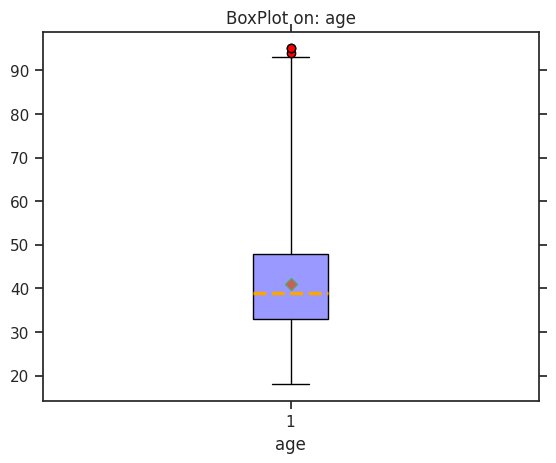

In [ ]:
# Boxplot for quantitative data
custom_boxplot(new_BDM, quantitative_list_BDM)

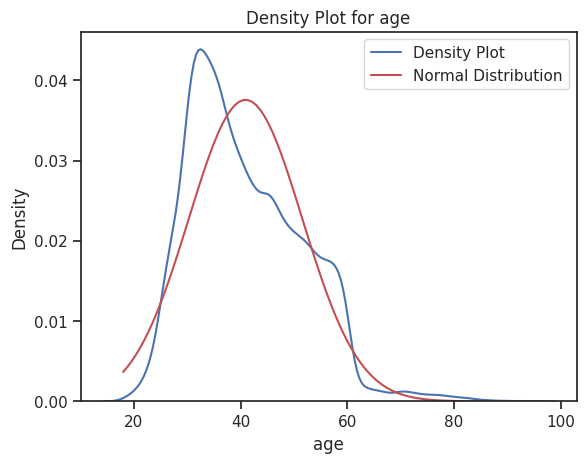

In [ ]:
# Density for quantitative data vs. normal distribution
plot_density_with_normal(new_BDM[quantitative_list_BDM])

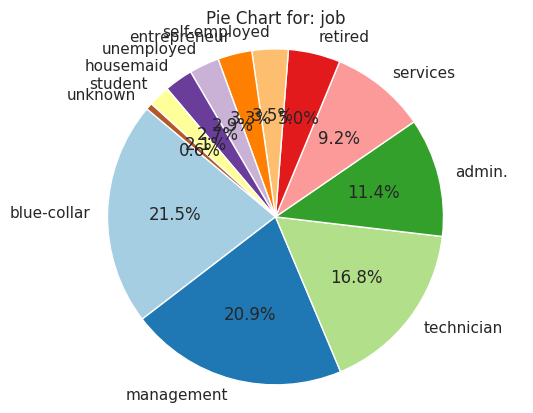

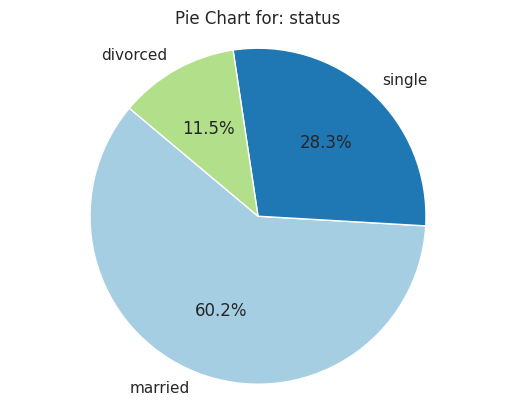

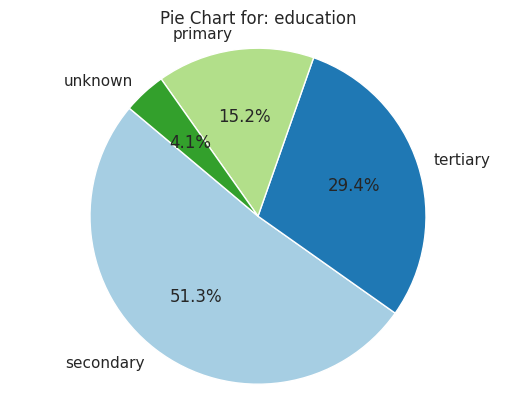

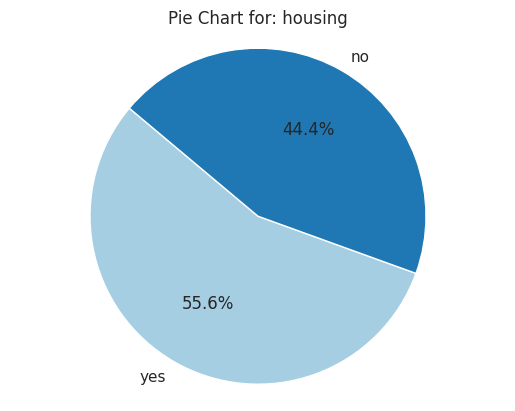

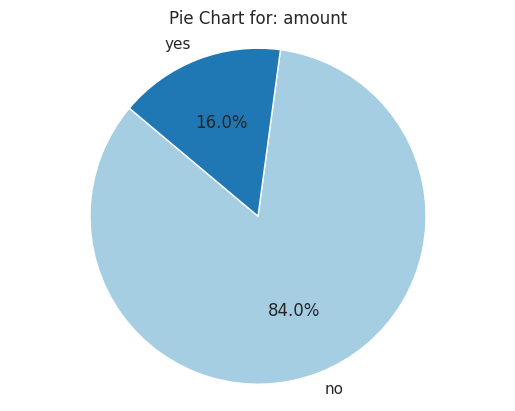

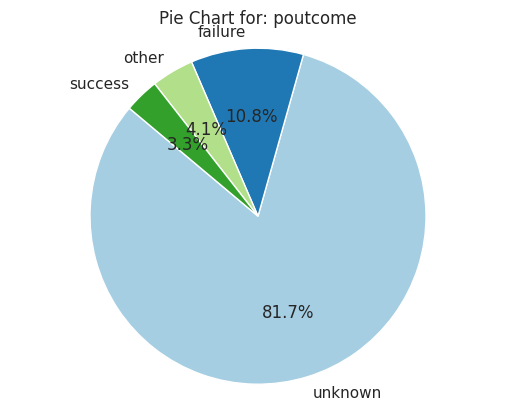

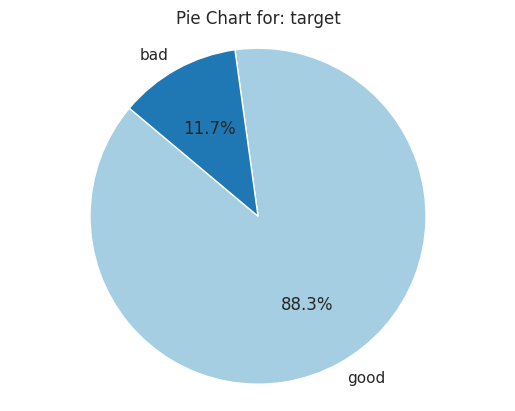

In [ ]:
# Pie char for qualitative variables
custom_pieplot(new_BDM, qualitative_list_BDM)

## Kaggl - Econometric Analysis

In [ ]:
AER.head(2)

card  reports       age  income     share  expenditure owner selfemp  \
0  yes        0  37.66667    4.52  0.033270   124.983300   yes      no   
1  yes        0  33.25000    2.42  0.005217     9.854167    no      no   

   dependents  months  majorcards  active  
0           3      54           1      12  
1           3      34           1      13

Credit Card Data from book "Econometric Analysis", a small credit card dataset for simple econometric analysis. Content:
* card: Dummy variable, 1 if application for credit card accepted, 0 if not
* reports: Number of major derogatory reports
* age: Age n years plus twelfths of a year
* income: Yearly income (divided by 10,000)
* share: Ratio of monthly credit card expenditure to yearly income
* expenditure: Average monthly credit card expenditure
* owner: 1 if owns their home, 0 if rent
* selfempl: 1 if self employed, 0 if not.
* dependents: 1 + number of dependents
* months: Months living at current address
* majorcards: Number of major credit cards held
* active: Number of active credit accounts

In [ ]:
# Select specific columns
selected_columns = ['card', 	'age', 	'income', 	'share',
                    'owner', 	'selfemp', 	'dependents']
new_AER = AER.loc[:, selected_columns]
# Create a dictionary to map old column names to new column names
column_name_mapping = {
    'share':'amount',
    'owner':'housing',
    'dependents':'status',
    'age':'age',
    'selfemp':'job',
    'income':'poutcome',
    'card':'target'
    # Add more mappings as needed
}

# Rename the columns
new_AER.rename(columns=column_name_mapping, inplace=True)
# Create a mapping dictionary
mapping_target = {'yes':'good', 'no':'bad'}
# Use the map function to replace values in the 'target' column
new_AER['target'] = new_AER['target'].map(mapping_target)


new_AER.head(2)

target       age  poutcome    amount housing job  status
0   good  37.66667      4.52  0.033270     yes  no       3
1   good  33.25000      2.42  0.005217      no  no       3

In [ ]:
# get column types
qualitative_list_AER, quantitative_list_AER = get_column_types(new_AER)
print("Qualitative Columns:", qualitative_list_AER)
print("Quantitative Columns:", quantitative_list_AER)

Qualitative Columns: ['target', 'housing', 'job']
Quantitative Columns: ['age', 'poutcome', 'amount', 'status']


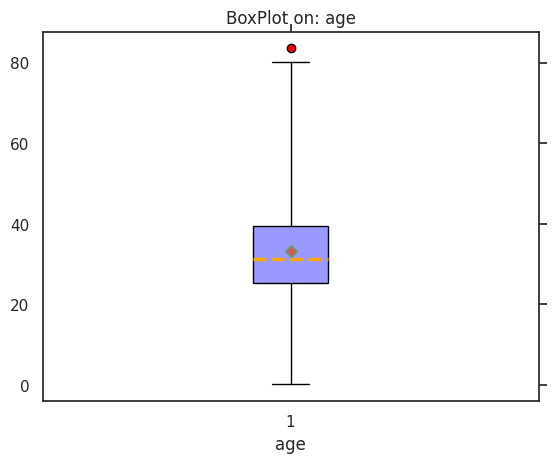

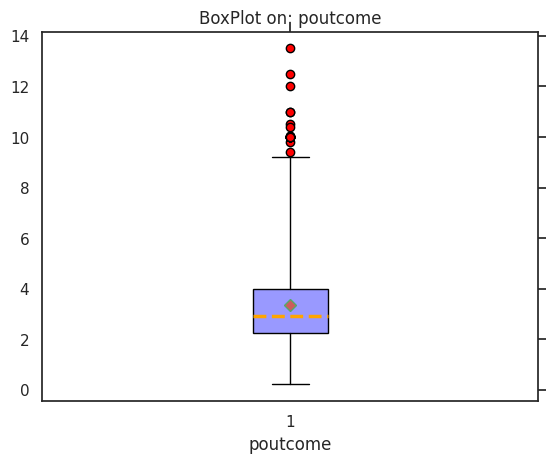

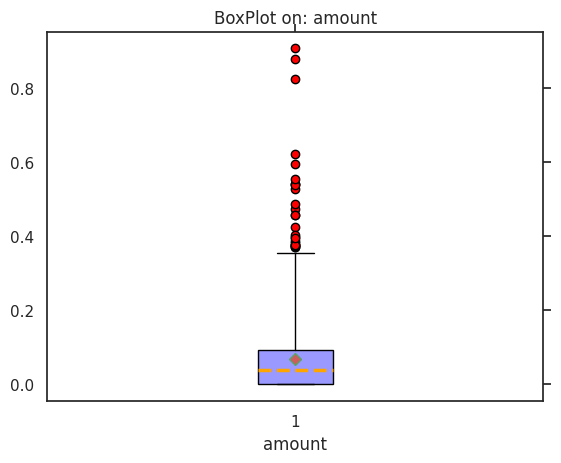

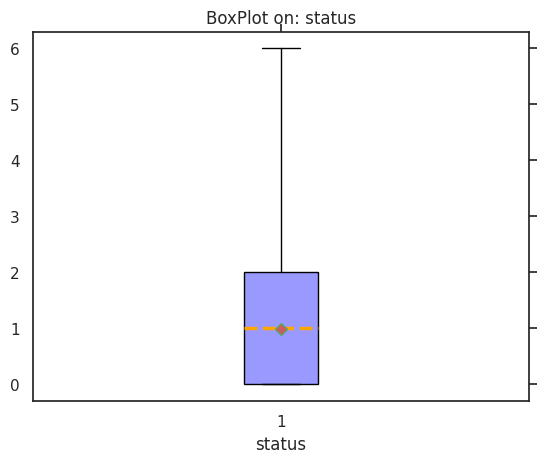

In [ ]:
# Boxplot for quantitative data
custom_boxplot(new_AER, quantitative_list_AER)

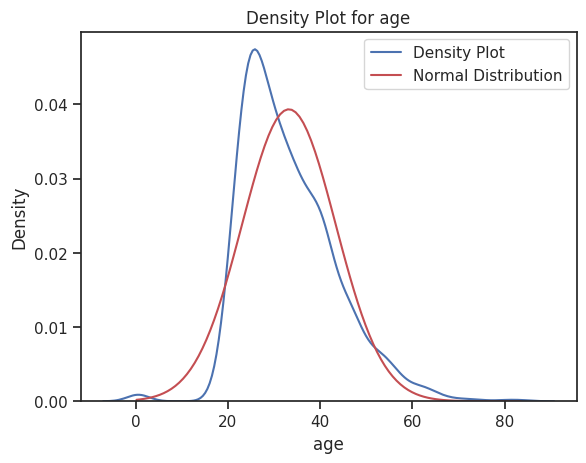

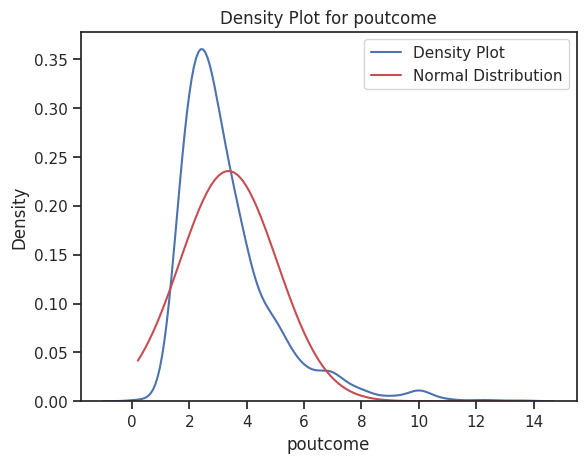

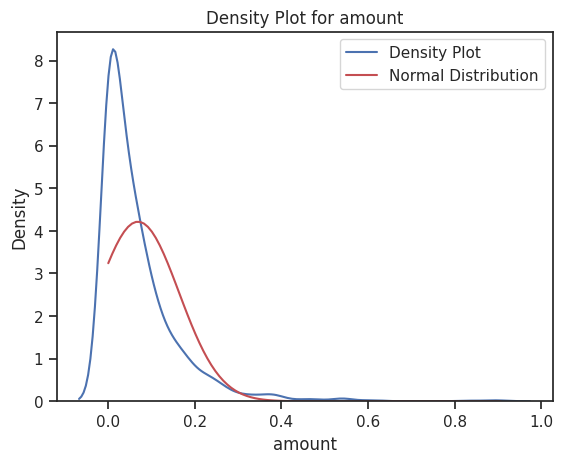

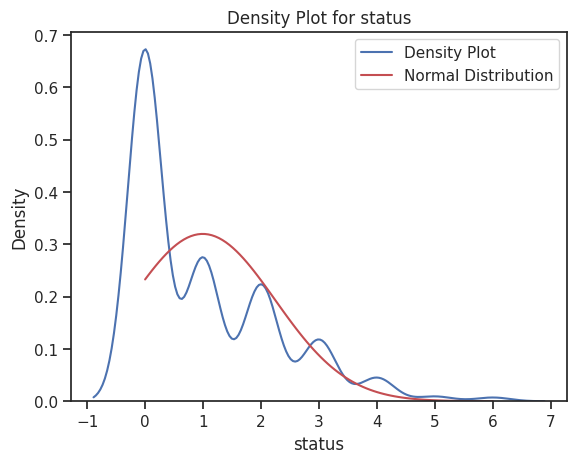

In [ ]:
# Density for quantitative data vs. normal distribution
plot_density_with_normal(new_AER[quantitative_list_AER])

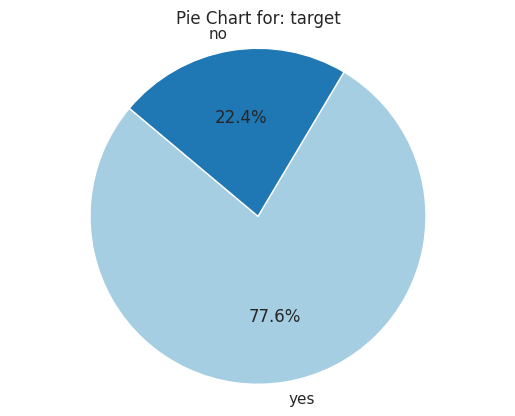

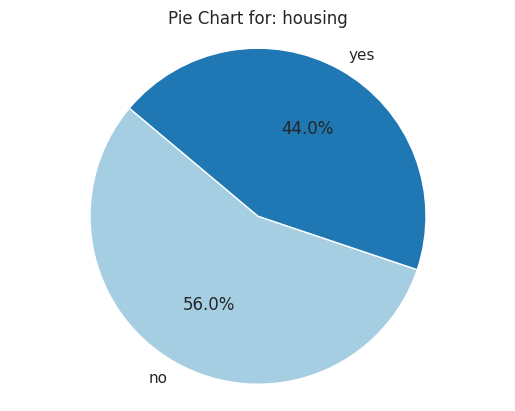

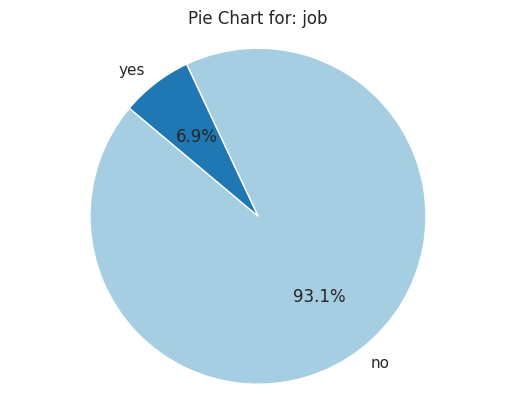

In [ ]:
# Pie char for qualitative variables
custom_pieplot(new_AER, qualitative_list_AER)

# Data preprocessing

## Missing Value

Once missing values have been identified, the next step is to correct them. Within this context, we have adopted two scenarios:

    If the percentage of missing values is greater than 25%, the variable will be removed. This choice is informed by the distribution of the variable. Imputing the missing values could lead to an imputation rate exceeding the observation rate, which poses a risk of altering the variable's characteristic.

    If the percentage of missing values is less than 25%, we will perform an imputation.

Note: There are several imputation techniques available:
* Simple imputation (replacing with: mean, variance, mode, median, ...)

* Imputation through modeling (regression, KNN, PCA, Kalman filter, ...)

=> The decision regarding the effectiveness of the chosen technique will be based on the difference in density before and after imputation.

### German database

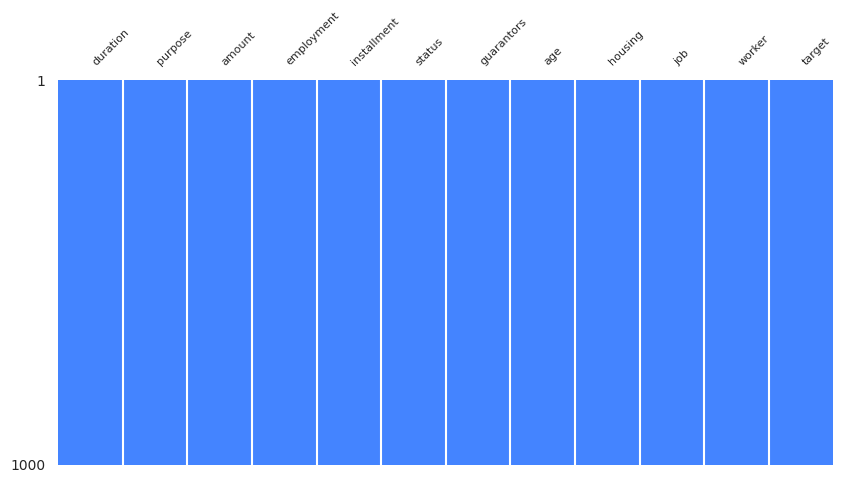

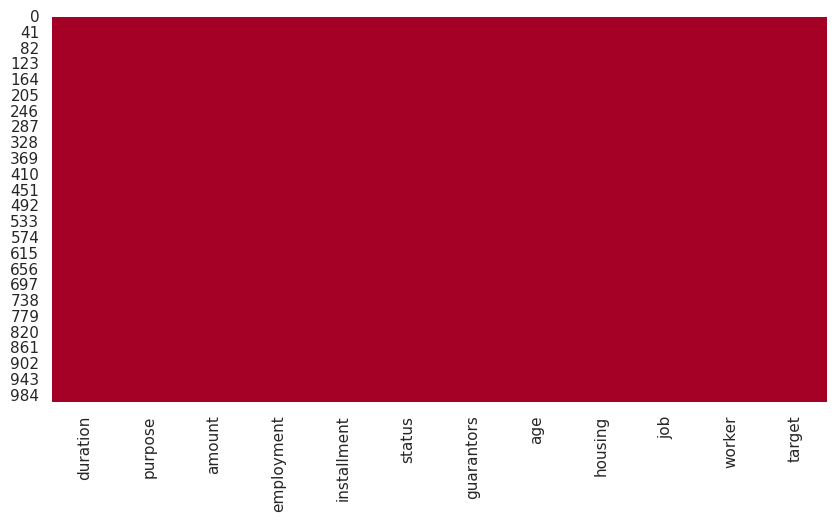

/usr/local/lib/python3.10/dist-packages/scipy/cluster/hierarchy.py:2848: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([dvw, 0])


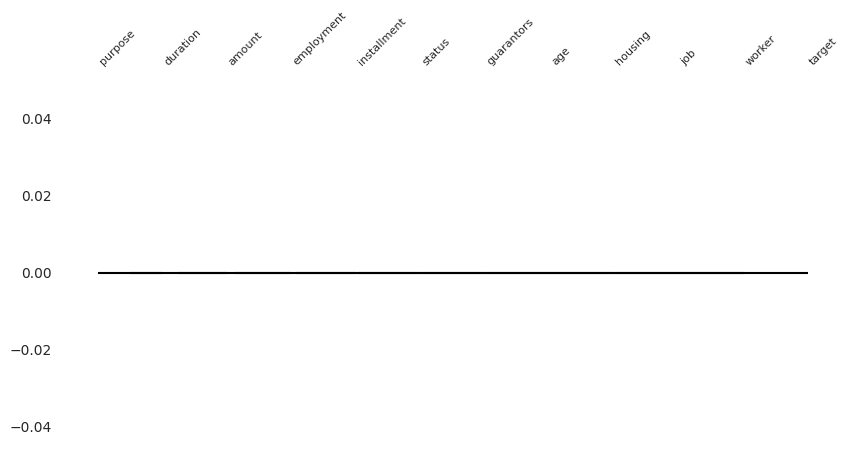

Variables with no missing values: ['duration', 'purpose', 'amount', 'employment', 'installment', 'status', 'guarantors', 'age', 'housing', 'job', 'worker', 'target']
Variables with missing values less than or equal to 5%: ['duration', 'purpose', 'amount', 'employment', 'installment', 'status', 'guarantors', 'age', 'housing', 'job', 'worker', 'target']
Variables with missing values between 5% and 25%: []
Variables with missing values over 25%: []


In [ ]:
# Assuming df_concat is your DataFrame
no_missing, less_than_5, between_5_and_25, over_25 = analyze_missing_values(new_german)

print("Variables with no missing values:", no_missing)
print("Variables with missing values less than or equal to 5%:", less_than_5)
print("Variables with missing values between 5% and 25%:", between_5_and_25)
print("Variables with missing values over 25%:", over_25)


In [ ]:
strategy = 'median'  # Replace with your desired strategy
new_german_corrigee = detecter_corriger_valeurs_manquantes(new_german, strategy=strategy)

### Taiwan database

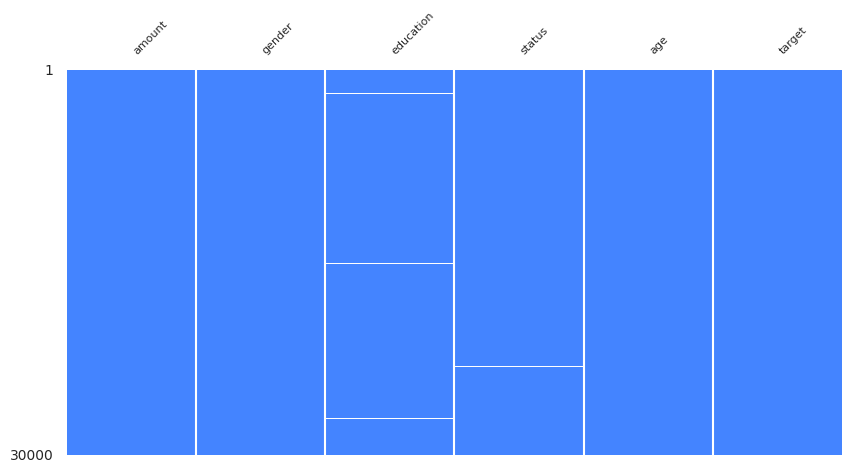

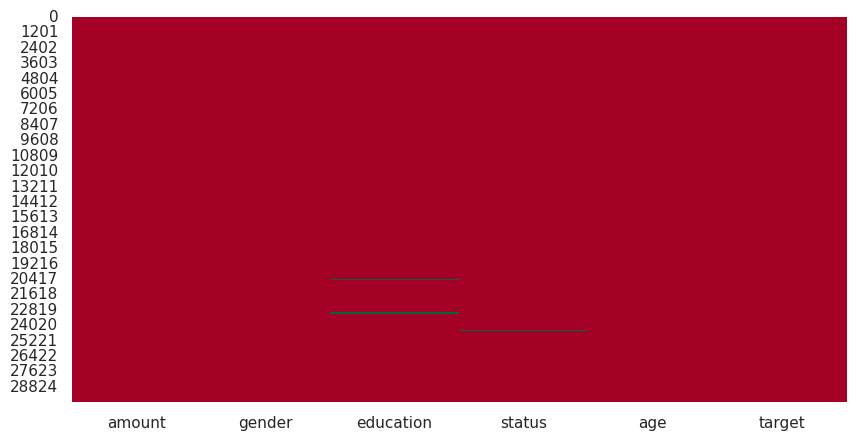

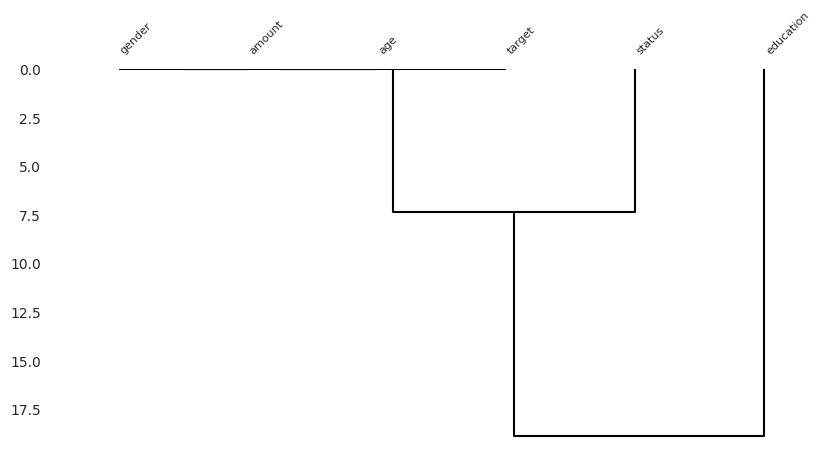

Variables with no missing values: ['amount', 'gender', 'age', 'target']
Variables with missing values less than or equal to 5%: ['amount', 'gender', 'education', 'status', 'age', 'target']
Variables with missing values between 5% and 25%: []
Variables with missing values over 25%: []


In [ ]:
# Assuming df_concat is your DataFrame
no_missing, less_than_5, between_5_and_25, over_25 = analyze_missing_values(new_taiwan)

print("Variables with no missing values:", no_missing)
print("Variables with missing values less than or equal to 5%:", less_than_5)
print("Variables with missing values between 5% and 25%:", between_5_and_25)
print("Variables with missing values over 25%:", over_25)

In [ ]:
strategy = 'median'  # Replace with your desired strategy
new_taiwan_corrigee = detecter_corriger_valeurs_manquantes(new_taiwan, strategy=strategy)

### AER database

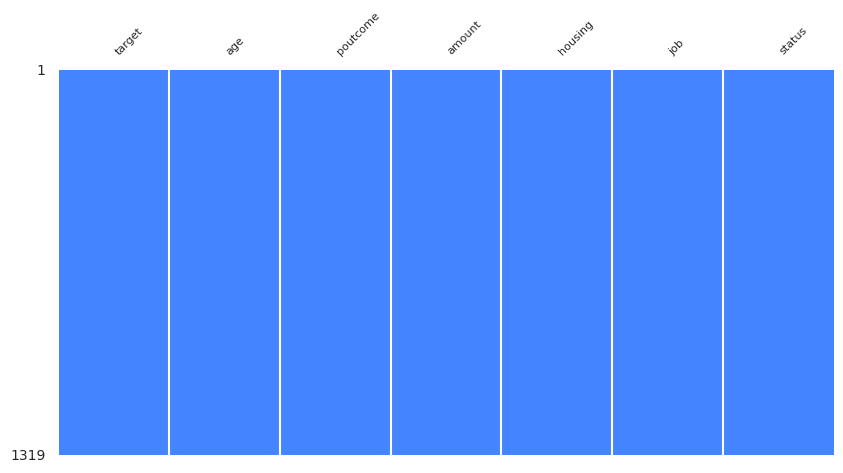

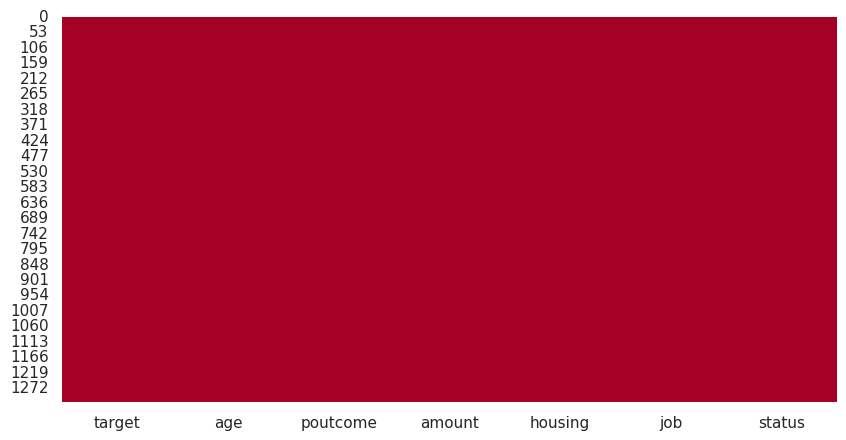

/usr/local/lib/python3.10/dist-packages/scipy/cluster/hierarchy.py:2848: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([dvw, 0])


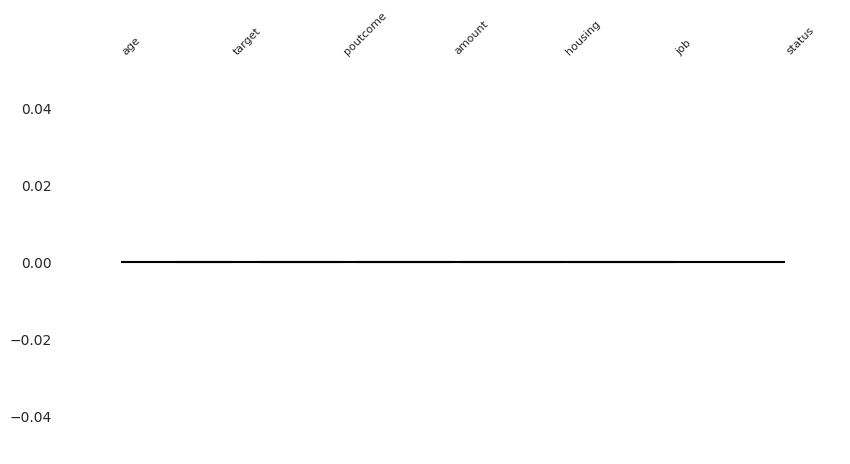

Variables with no missing values: ['target', 'age', 'poutcome', 'amount', 'housing', 'job', 'status']
Variables with missing values less than or equal to 5%: ['target', 'age', 'poutcome', 'amount', 'housing', 'job', 'status']
Variables with missing values between 5% and 25%: []
Variables with missing values over 25%: []


In [ ]:
# Assuming df_concat is your DataFrame
no_missing, less_than_5, between_5_and_25, over_25 = analyze_missing_values(new_AER)

print("Variables with no missing values:", no_missing)
print("Variables with missing values less than or equal to 5%:", less_than_5)
print("Variables with missing values between 5% and 25%:", between_5_and_25)
print("Variables with missing values over 25%:", over_25)

In [ ]:
strategy = 'median'  # Replace with your desired strategy
new_AER_corrigee = detecter_corriger_valeurs_manquantes(new_AER, strategy=strategy)

### BDM database

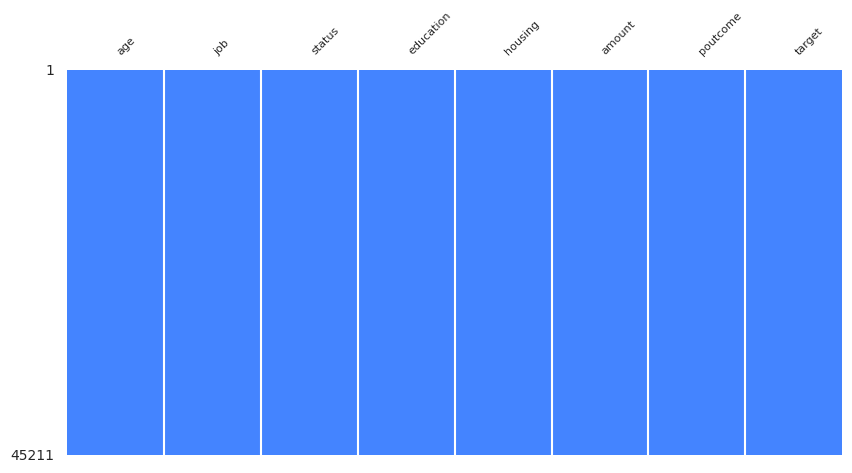

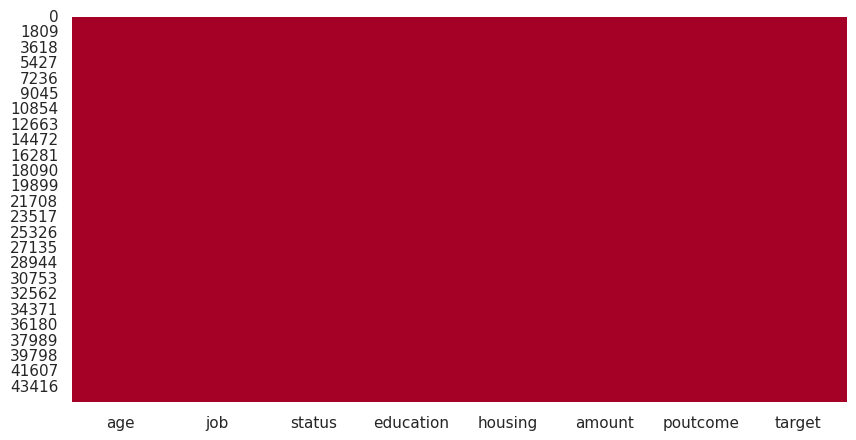

/usr/local/lib/python3.10/dist-packages/scipy/cluster/hierarchy.py:2848: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([dvw, 0])


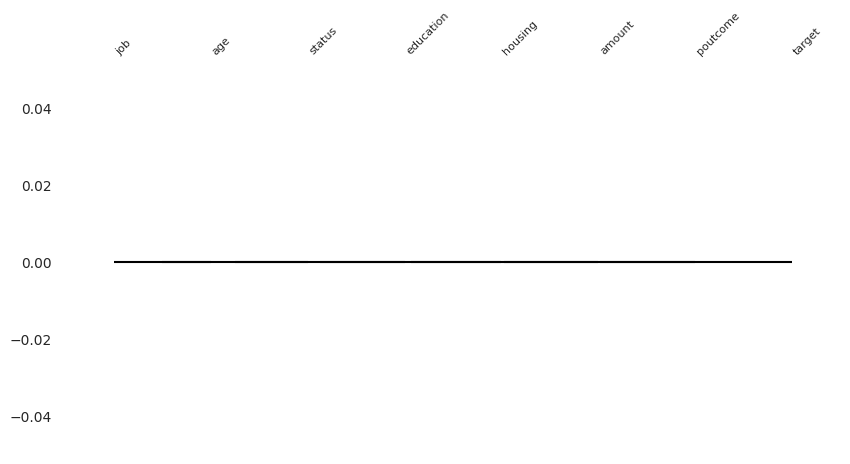

Variables with no missing values: ['age', 'job', 'status', 'education', 'housing', 'amount', 'poutcome', 'target']
Variables with missing values less than or equal to 5%: ['age', 'job', 'status', 'education', 'housing', 'amount', 'poutcome', 'target']
Variables with missing values between 5% and 25%: []
Variables with missing values over 25%: []


In [ ]:
# Assuming df_concat is your DataFrame
no_missing, less_than_5, between_5_and_25, over_25 = analyze_missing_values(new_BDM)

print("Variables with no missing values:", no_missing)
print("Variables with missing values less than or equal to 5%:", less_than_5)
print("Variables with missing values between 5% and 25%:", between_5_and_25)
print("Variables with missing values over 25%:", over_25)

In [ ]:
strategy = 'median'  # Replace with your desired strategy
new_BDM_corrigee = detecter_corriger_valeurs_manquantes(new_BDM, strategy=strategy)

## Outliers and collinearity

In the previous section, 'Data Understanding,' we identified these anomalies.

# Spliting Data

In [ ]:
train_german, test_german = split_data_to_train_test(new_german_corrigee, ratio=0.8)
train_taiwan, test_taiwan = split_data_to_train_test(new_taiwan_corrigee, ratio=0.8)
train_BDM, test_BDM = split_data_to_train_test(new_BDM_corrigee, ratio=0.8)
train_AER, test_AER = split_data_to_train_test(new_AER_corrigee, ratio=0.8)

# Data transformation

As announced in the attached support document for this project, the data transformation method used is the Weight of Evidence (WoE) transformation.

In [ ]:
bins_german = sc.woebin(train_german, y="target")
bins_taiwan = sc.woebin(train_taiwan, y="target")
bins_BDM = sc.woebin(train_BDM, y="target")
bins_AER = sc.woebin(train_AER, y="target")

[INFO] creating woe binning ...


/usr/local/lib/python3.10/dist-packages/scorecardpy/condition_fun.py:141: UserWarning: The positive value in "target" was replaced by 1 and negative value by 0.
  warnings.warn("The positive value in \"{}\" was replaced by 1 and negative value by 0.".format(y))


[INFO] creating woe binning ...


/usr/local/lib/python3.10/dist-packages/scorecardpy/condition_fun.py:141: UserWarning: The positive value in "target" was replaced by 1 and negative value by 0.
  warnings.warn("The positive value in \"{}\" was replaced by 1 and negative value by 0.".format(y))


[INFO] creating woe binning ...


/usr/local/lib/python3.10/dist-packages/scorecardpy/condition_fun.py:141: UserWarning: The positive value in "target" was replaced by 1 and negative value by 0.
  warnings.warn("The positive value in \"{}\" was replaced by 1 and negative value by 0.".format(y))


[INFO] creating woe binning ...


/usr/local/lib/python3.10/dist-packages/scorecardpy/condition_fun.py:141: UserWarning: The positive value in "target" was replaced by 1 and negative value by 0.
  warnings.warn("The positive value in \"{}\" was replaced by 1 and negative value by 0.".format(y))


{'job': <Figure size 640x480 with 2 Axes>,
 'worker': <Figure size 640x480 with 2 Axes>,
 'duration': <Figure size 640x480 with 2 Axes>,
 'amount': <Figure size 640x480 with 2 Axes>,
 'guarantors': <Figure size 640x480 with 2 Axes>,
 'status': <Figure size 640x480 with 2 Axes>,
 'installment': <Figure size 640x480 with 2 Axes>,
 'housing': <Figure size 640x480 with 2 Axes>,
 'purpose': <Figure size 640x480 with 2 Axes>,
 'employment': <Figure size 640x480 with 2 Axes>,
 'age': <Figure size 640x480 with 2 Axes>}

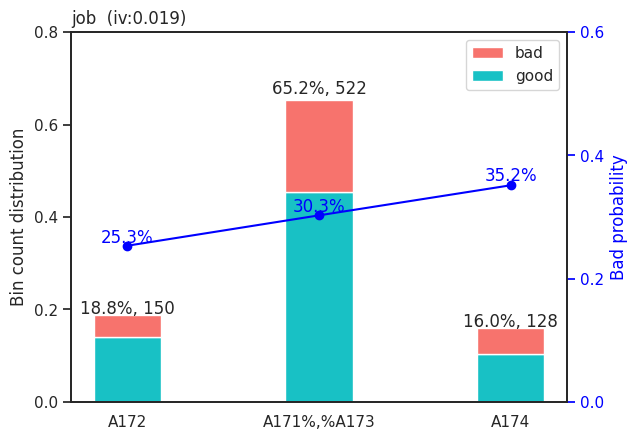

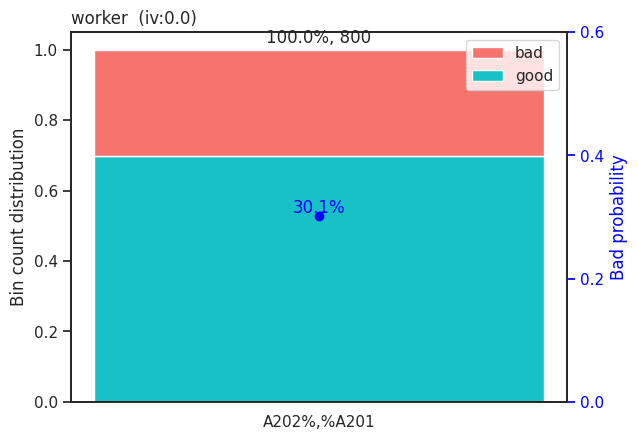

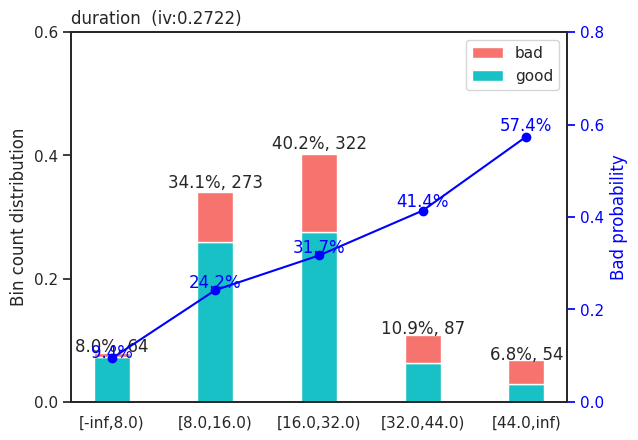

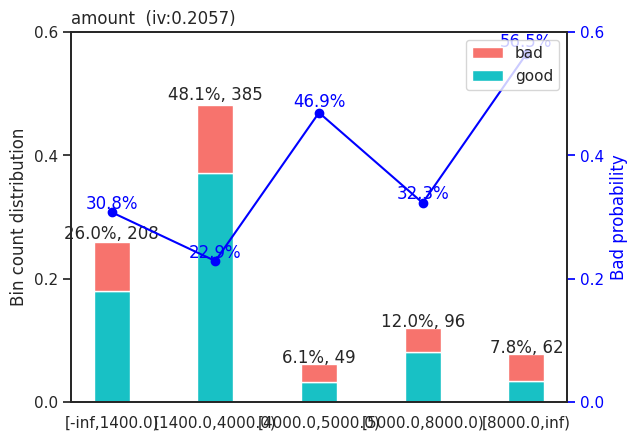

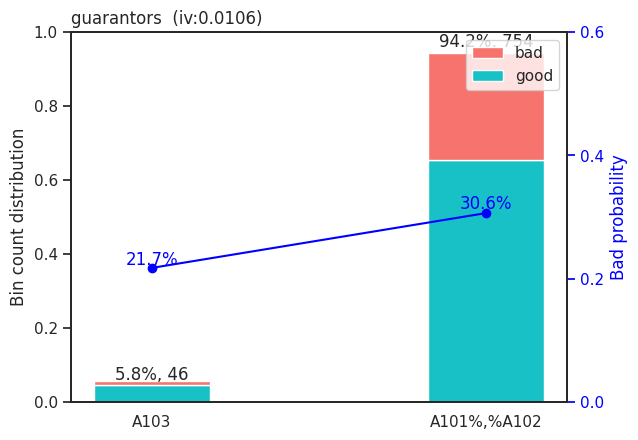

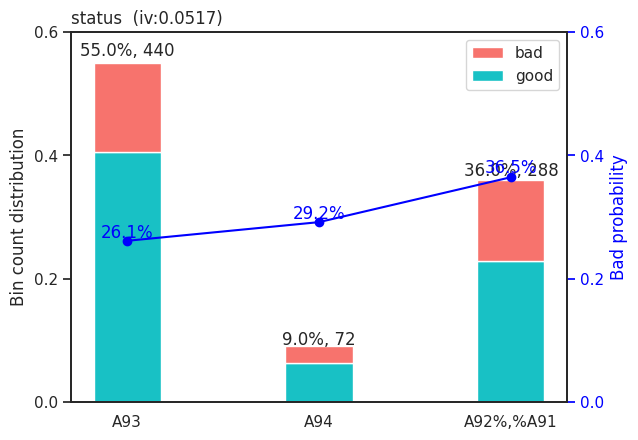

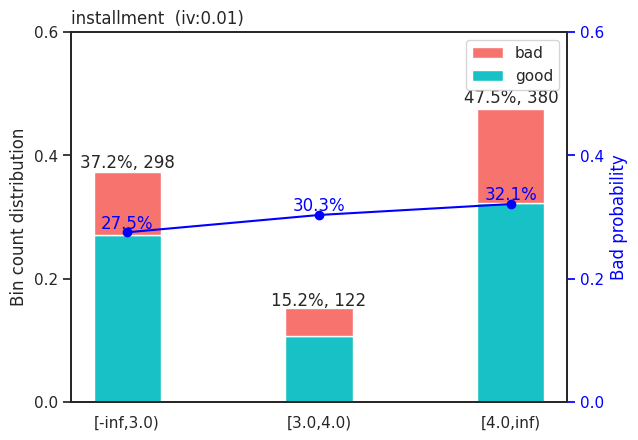

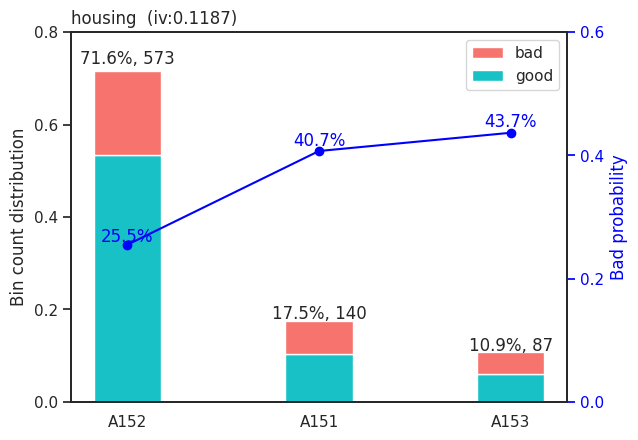

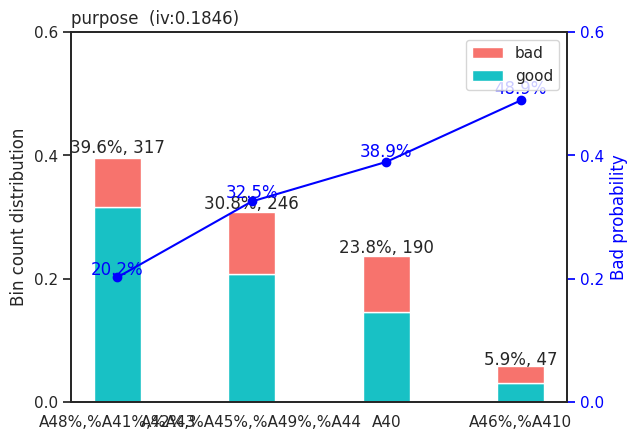

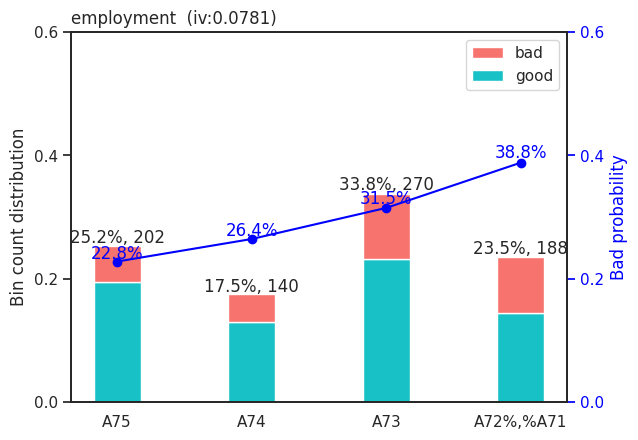

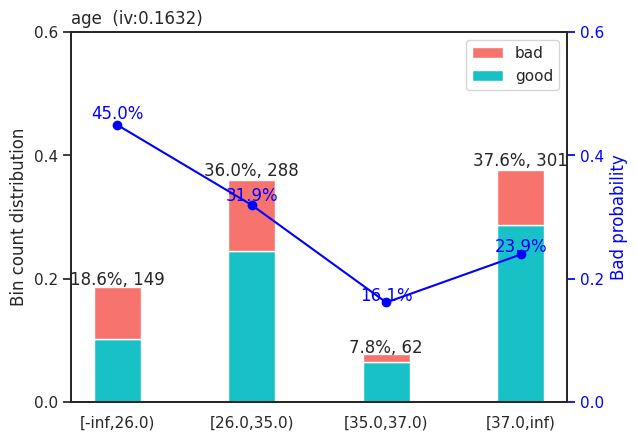

In [ ]:
sc.woebin_plot(bins_german)

{'education': <Figure size 640x480 with 2 Axes>,
 'amount': <Figure size 640x480 with 2 Axes>,
 'status': <Figure size 640x480 with 2 Axes>,
 'age': <Figure size 640x480 with 2 Axes>,
 'gender': <Figure size 640x480 with 2 Axes>}

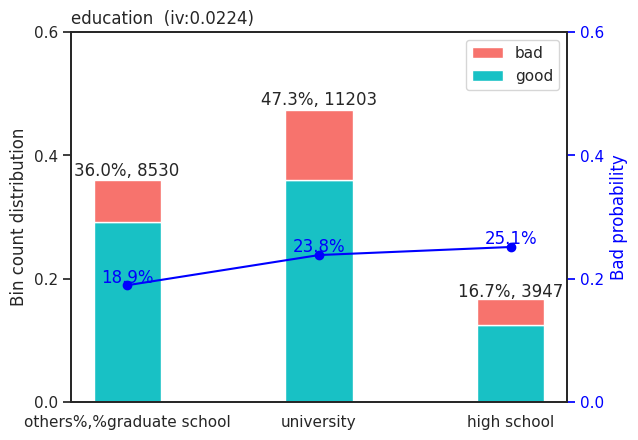

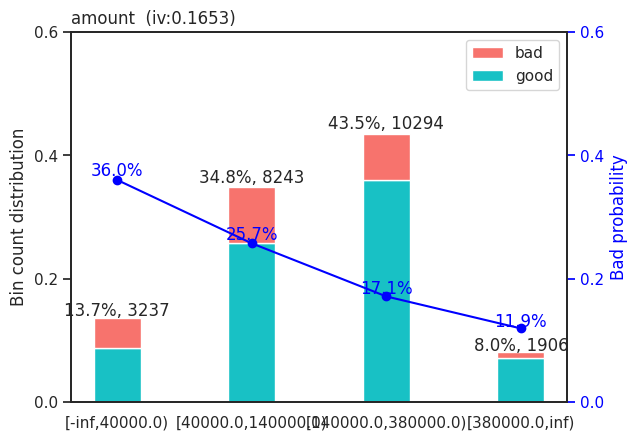

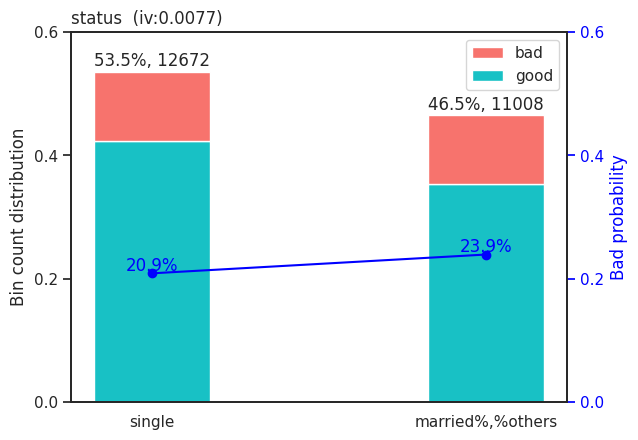

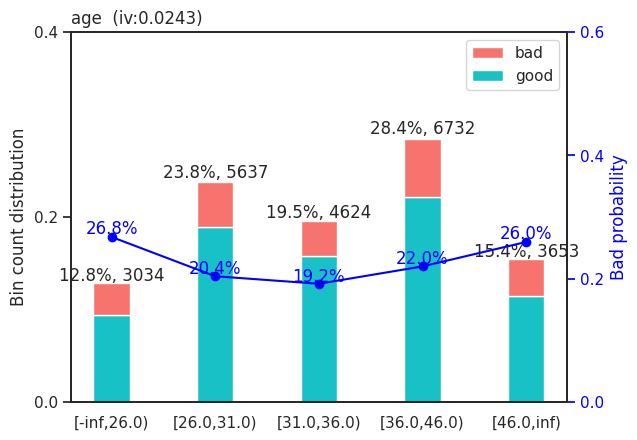

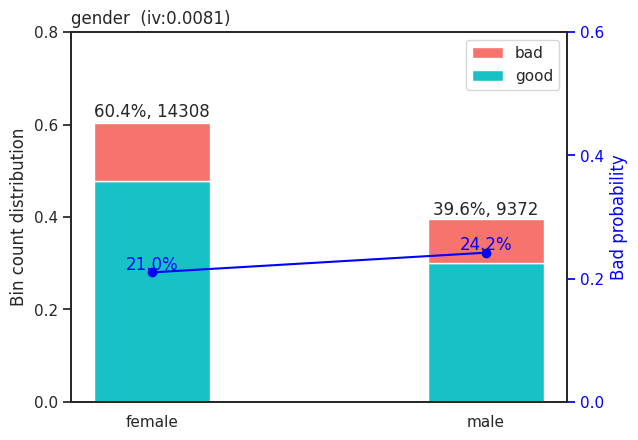

In [ ]:
sc.woebin_plot(bins_taiwan)

{'poutcome': <Figure size 640x480 with 2 Axes>,
 'education': <Figure size 640x480 with 2 Axes>,
 'job': <Figure size 640x480 with 2 Axes>,
 'amount': <Figure size 640x480 with 2 Axes>,
 'status': <Figure size 640x480 with 2 Axes>,
 'housing': <Figure size 640x480 with 2 Axes>,
 'age': <Figure size 640x480 with 2 Axes>}

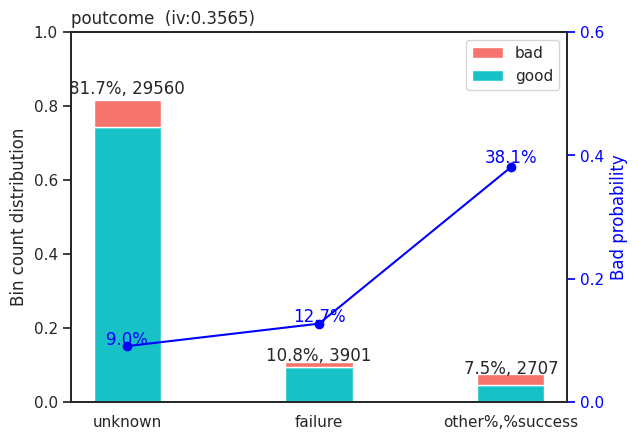

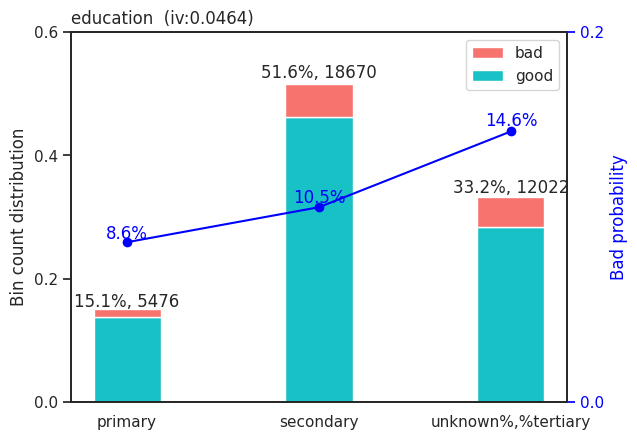

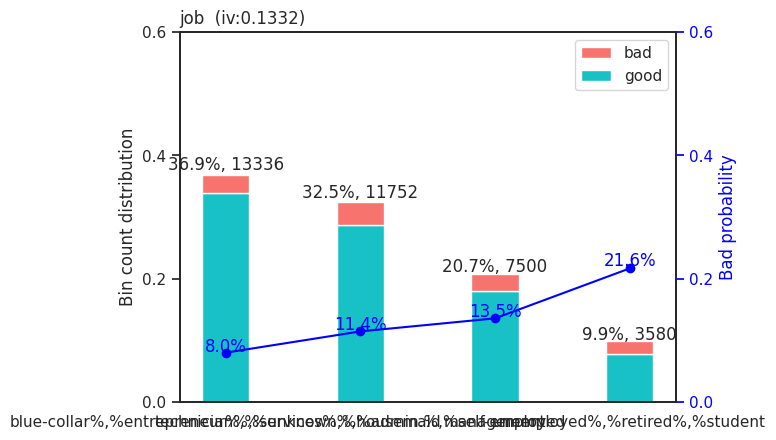

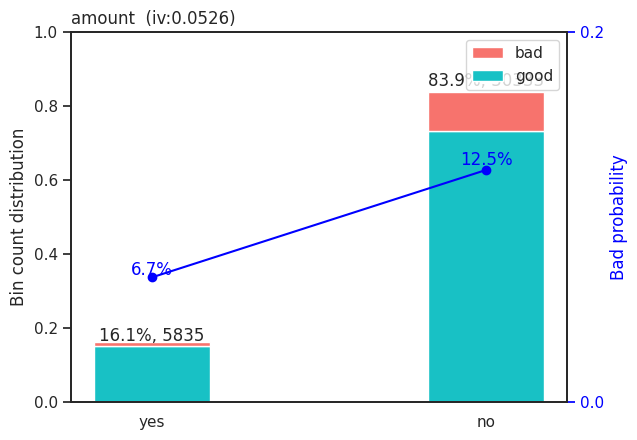

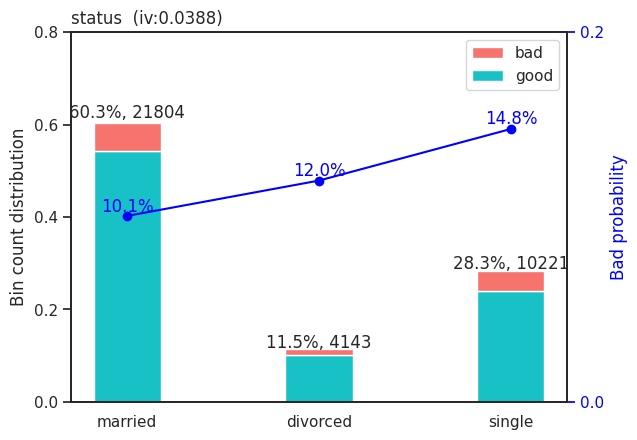

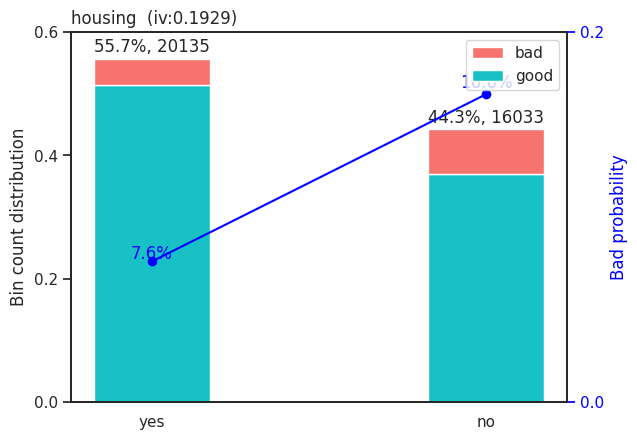

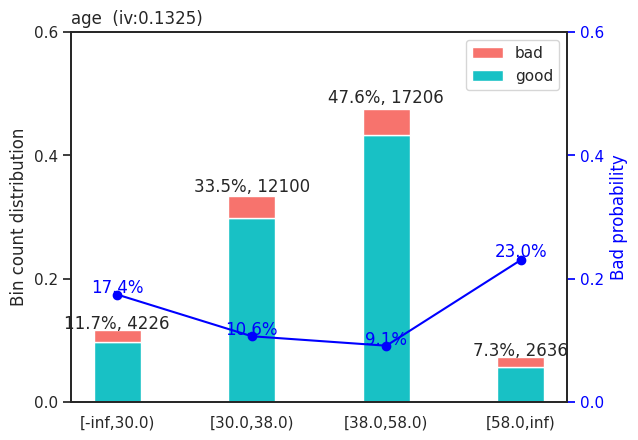

In [ ]:
sc.woebin_plot(bins_BDM)

{'poutcome': <Figure size 640x480 with 2 Axes>,
 'job': <Figure size 640x480 with 2 Axes>,
 'amount': <Figure size 640x480 with 2 Axes>,
 'status': <Figure size 640x480 with 2 Axes>,
 'housing': <Figure size 640x480 with 2 Axes>,
 'age': <Figure size 640x480 with 2 Axes>}

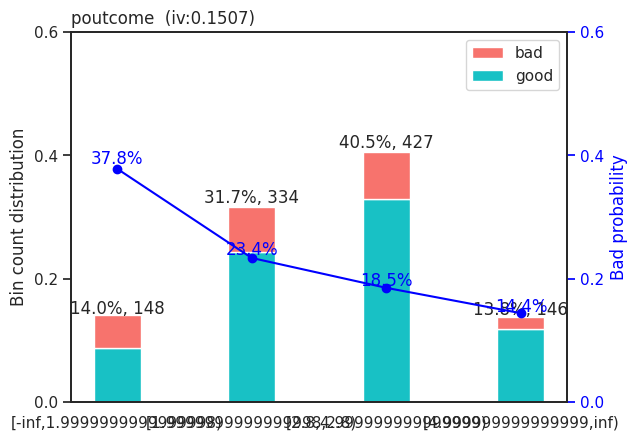

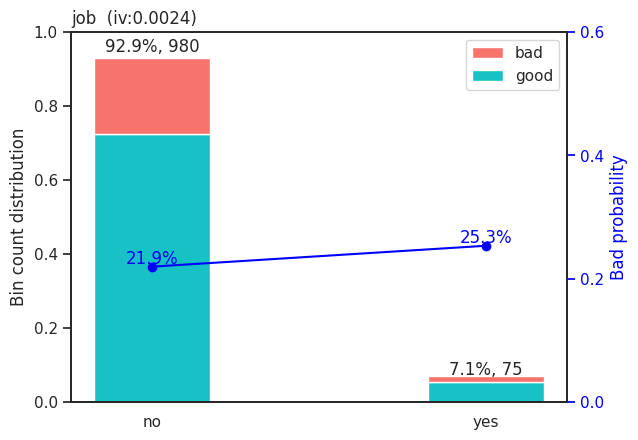

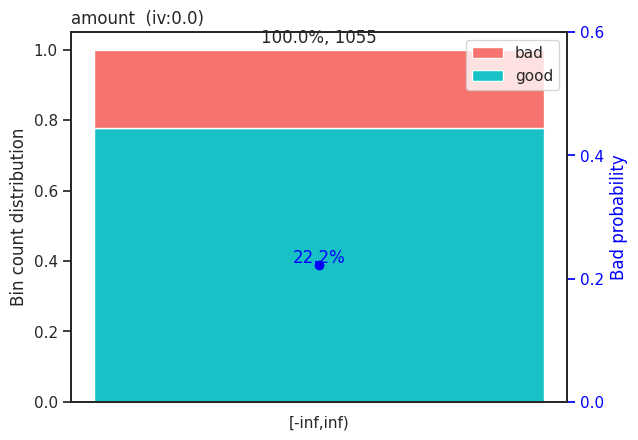

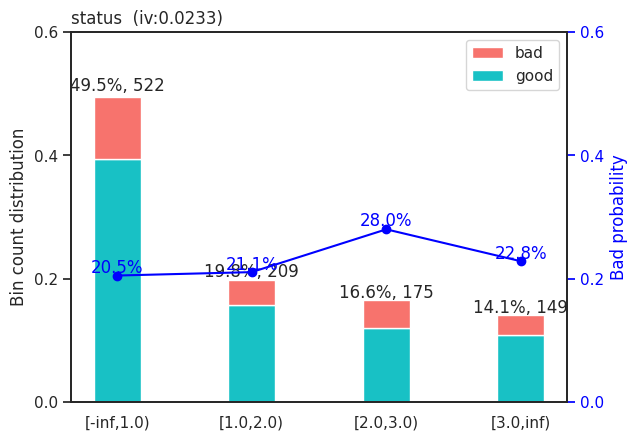

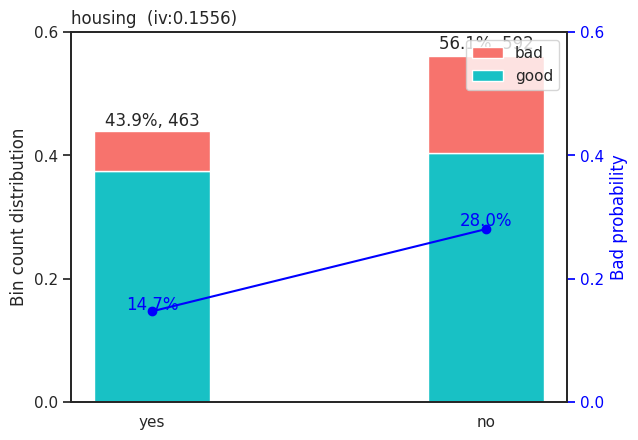

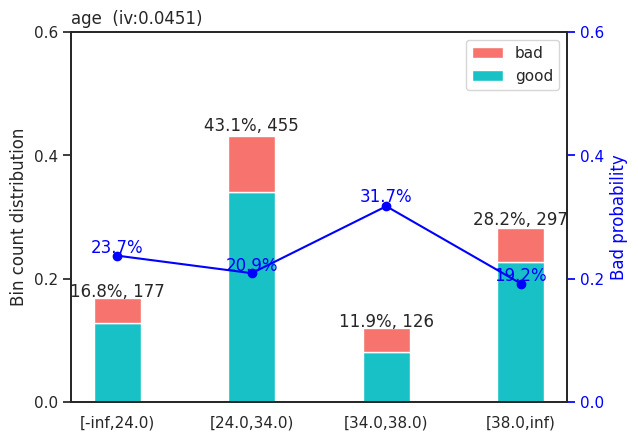

In [ ]:
sc.woebin_plot(bins_AER)

In [ ]:
# converting train and test into woe values
train_german_woe = sc.woebin_ply(train_german, bins_german)
test_german_woe = sc.woebin_ply(test_german, bins_german)

train_taiwan_woe = sc.woebin_ply(train_taiwan, bins_taiwan)
test_taiwan_woe = sc.woebin_ply(test_taiwan, bins_taiwan)

train_BDM_woe = sc.woebin_ply(train_BDM, bins_BDM)
test_BDM_woe = sc.woebin_ply(test_BDM, bins_BDM)

train_AER_woe = sc.woebin_ply(train_AER, bins_AER)
test_AER_woe = sc.woebin_ply(test_AER, bins_AER)

[INFO] converting into woe values ...
[INFO] converting into woe values ...
[INFO] converting into woe values ...
[INFO] converting into woe values ...
[INFO] converting into woe values ...
[INFO] converting into woe values ...
[INFO] converting into woe values ...
[INFO] converting into woe values ...


# Feature selection

There are several algorithms for selecting relevant variables, which can be categorized into three groups:

    Wrapper Methods: Forward Selection, Backward Elimination, Bi-directional Elimination, Exhaustive Selection, Recursive Elimination.

    Filter Methods: Information Gain, Chi-square Test, Fisher’s Score, Correlation Coefficient, Variance Threshold, Mean Absolute Difference, Dispersion Ratio, Mutual Dependence, Relief, Pearson’s Correlation, Spearman’s Rank, ANOVA, Kendall’s Rank.

    Embedded Methods: Regularization, Tree-based Methods.

In my opinion, the ideal approach involves a 'vote' among these algorithms, and subsequently adopting the variables that receive the most votes.

*** Note: An expert's input could be incorporated here, with the weights being adjusted according to their choice. ***

In [ ]:
X_german = train_german_woe.drop('target', axis=1)
y_german = train_german_woe[['target']]

X_taiwan = train_taiwan_woe.drop('target', axis=1)
y_taiwan = train_taiwan_woe[['target']]

X_BDM = train_BDM_woe.drop('target', axis=1)
y_BDM = train_BDM_woe[['target']]

X_AER = train_AER_woe.drop('target', axis=1)
y_AER = train_AER_woe[['target']]

In [ ]:
X_german_t = test_german_woe.drop('target', axis=1)
y_german_t = test_german_woe[['target']]

X_taiwan_t = test_taiwan_woe.drop('target', axis=1)
y_taiwan_t = test_taiwan_woe[['target']]

X_BDM_t = test_BDM_woe.drop('target', axis=1)
y_BDM_t = test_BDM_woe[['target']]

X_AER_t = test_AER_woe.drop('target', axis=1)
y_AER_t = test_AER_woe[['target']]

In [ ]:
feature_selection_german = feature_selection(X_german, y_german)
selected_features_german = select_features_by_vote(feature_selection_german, vote=4)
feature_selection_german

[LightGBM] [Info] Number of positive: 241, number of negative: 559
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000099 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 46
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.301250 -> initscore=-0.841353
[LightGBM] [Info] Start training from score -0.841353
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Feature  Pearson  Chi-2   RFE  Logistics  Random Forest  LightGBM  \
1        amount_woe     True   True  True       True           True      True   
2       purpose_woe     True   True  True       True           True     False   
3    employment_woe     True   True  True      False           True      True   
4      duration_woe     True   True  True       True           True     False   
5           age_woe     True   True  True       True           True     False   
6        status_woe     True   True  True      False          False      True   
7   installment_woe     True   True  True      False           True     False   
8       housing_woe     True   True  True      False          False      True   
9        worker_woe     True   True  True      False          False     False   
10          job_woe     True   True  True      False          False     False   
11   guarantors_woe     True   True  True      False          False     False   

    Total  
1       6  
2       5  
3       5  
4       5  
5       5  
6       4  
7       4  
8       4  
9       3  
10      3  
11      3

In [ ]:
feature_selection_taiwan = feature_selection(X_taiwan, y_taiwan)
selected_features_taiwan = select_features_by_vote(feature_selection_taiwan, vote=4)
feature_selection_taiwan

[LightGBM] [Info] Number of positive: 5275, number of negative: 18405
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001652 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 21
[LightGBM] [Info] Number of data points in the train set: 23680, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222762 -> initscore=-1.249644
[LightGBM] [Info] Start training from score -1.249644
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

Feature  Pearson  Chi-2   RFE  Logistics  Random Forest  LightGBM  \
1     amount_woe     True   True  True       True           True      True   
2  education_woe     True   True  True      False          False      True   
3        age_woe     True   True  True      False          False      True   
4     status_woe     True   True  True      False          False     False   
5     gender_woe     True   True  True      False          False     False   

   Total  
1      6  
2      4  
3      4  
4      3  
5      3

In [ ]:
feature_selection_BDM = feature_selection(X_BDM, y_BDM)
selected_features_BDM = select_features_by_vote(feature_selection_BDM, vote=4)
feature_selection_BDM

[LightGBM] [Info] Number of positive: 4198, number of negative: 31970
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002023 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 28
[LightGBM] [Info] Number of data points in the train set: 36168, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116069 -> initscore=-2.030190
[LightGBM] [Info] Start training from score -2.030190
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

Feature  Pearson  Chi-2   RFE  Logistics  Random Forest  LightGBM  \
1   poutcome_woe     True   True  True       True           True      True   
2    housing_woe     True   True  True       True           True      True   
3        age_woe     True   True  True       True          False      True   
4  education_woe     True   True  True      False          False      True   
5     status_woe     True   True  True      False          False     False   
6        job_woe     True   True  True      False          False     False   
7     amount_woe     True   True  True      False          False     False   

   Total  
1      6  
2      6  
3      5  
4      4  
5      3  
6      3  
7      3

In [ ]:
feature_selection_AER = feature_selection(X_AER, y_AER)
selected_features_AER = select_features_by_vote(feature_selection_AER, vote=4)
feature_selection_AER

[LightGBM] [Info] Number of positive: 234, number of negative: 821
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000098 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 21
[LightGBM] [Info] Number of data points in the train set: 1055, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221801 -> initscore=-1.255202
[LightGBM] [Info] Start training from score -1.255202
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Feature  Pearson  Chi-2   RFE  Logistics  Random Forest  LightGBM  \
1  poutcome_woe     True   True  True       True           True      True   
2       age_woe     True   True  True       True           True      True   
3    status_woe     True   True  True       True           True     False   
4   housing_woe     True   True  True       True          False      True   
5       job_woe     True   True  True      False          False     False   
6    amount_woe     True   True  True      False          False     False   

   Total  
1      6  
2      6  
3      5  
4      5  
5      3  
6      3

In [ ]:
X_german = X_german[selected_features_german]
X_taiwan = X_taiwan[selected_features_taiwan]
X_BDM = X_BDM[selected_features_BDM]
X_AER = X_AER[selected_features_AER]

In [ ]:
X_german = X_german[selected_features_german]
X_taiwan = X_taiwan[selected_features_taiwan]
X_BDM = X_BDM[selected_features_BDM]
X_AER = X_AER[selected_features_AER]

In [ ]:
X_german_t = X_german_t[selected_features_german]
X_taiwan_t = X_taiwan_t[selected_features_taiwan]
X_BDM_t = X_BDM_t[selected_features_BDM]
X_AER_t = X_AER_t[selected_features_AER]

# Modeling

## Fiting (Training)

In [6]:
y_german['target'] = y_german['target'].replace({'good': 0, 'bad': 1})
y_taiwan['target'] = y_taiwan['target'].replace({'good': 0, 'bad': 1})
y_BDM['target'] = y_BDM['target'].replace({'good': 0, 'bad': 1})
y_AER['target'] = y_AER['target'].replace({'good': 0, 'bad': 1})

y_german_t['target'] = y_german_t['target'].replace({'good': 0, 'bad': 1})
y_taiwan_t['target'] = y_taiwan_t['target'].replace({'good': 0, 'bad': 1})
y_BDM_t['target'] = y_BDM_t['target'].replace({'good': 0, 'bad': 1})
y_AER_t['target'] = y_AER_t['target'].replace({'good': 0, 'bad': 1})

In [ ]:
model_types = ['Logistic', 'RandomForest', 'XGBoost','LightGBM', 'GradientBoosting', 'CatBoost']  # List of model types 'LightGBM', 'GradientBoosting', 'CatBoost', 'gam'
sampling_type_to_use = 'SMOTE'      # Choose the desired sampling type: 'SMOTE', 'Random', 'ADASYN'
n_estimators_to_use = 100

In [ ]:
# Fit and save models using the function
trained_models_german = fit_multiple_algorithms(model_types, X_german, X_german_t, y_german, sampling_type_to_use, n_estimators_to_use, 'german')
# Now you have a dictionary of trained models for each model type
for model_type, model_fit in trained_models_german.items():
    print(f"{model_type}: Model trained")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[LightGBM] [Info] Number of positive: 559, number of negative: 559
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000326 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 334
[LightGBM] [Info] Number of data points in the train set: 1118, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning rate set to 0.010805
0:	learn: 0.6894508	total: 48.2ms	remaining: 48.2s
1:	learn: 0.6861880	total: 50.6ms	remaining: 25.2s
2:	learn: 0.6832437	total: 52ms	remaining: 17.3s
3:	learn: 0.6795270	total: 53.3ms	remaining: 13.3s
4:	learn: 0.6765305	total: 54.6ms	remaining: 10.9s
5:	learn: 0.6729804	total: 56.5ms	remaining: 9.36s
6:	learn: 0.6694591	total: 57.8ms	remaining: 8.2s
7:	learn: 0.6661214	total: 59ms	remaining: 7.32s
8:	learn: 0.6638115	total: 60.3ms	remaining: 6.64s
9:	learn: 0.6608549	total: 61.9ms	remaining: 6.13s
10:	learn: 0.6575438	total: 63.2ms	remaining: 5.68s
11:	learn: 0.6553745	total: 65ms	remaining: 5.35s
12:	learn: 0.6532494	total: 67.2ms	remaining: 5.1s
13:	learn: 0.6508130	total: 69ms	remaining: 4.86s
14:	learn: 0.6478773	total: 70.9ms	remaining: 4.66s
15:	learn: 0.6453267	total: 72.9ms	remaining: 4.48s
16:	learn: 0.6425188	total: 75.3ms	remaining: 4.35s
17:	learn: 0.6398771	total: 77ms	remaining: 4.2s
18:	learn: 0.6367254	total: 78.3ms	remaining: 4.04s
19:	l

In [ ]:
trained_models_taiwan = fit_multiple_algorithms(model_types, X_taiwan, X_taiwan_t, y_taiwan, sampling_type_to_use, n_estimators_to_use, 'taiwan')
# Now you have a dictionary of trained models for each model type
for model_type, model_fit in trained_models_taiwan.items():
    print(f"{model_type}: Model trained")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[LightGBM] [Info] Number of positive: 18405, number of negative: 18405
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000336 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 18
[LightGBM] [Info] Number of data points in the train set: 36810, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning rate set to 0.04804
0:	learn: 0.6910135	total: 6.67ms	remaining: 6.66s
1:	learn: 0.6891777	total: 11.8ms	remaining: 5.88s
2:	learn: 0.6874573	total: 18.7ms	remaining: 6.2s
3:	learn: 0.6860223	total: 22.9ms	remaining: 5.7s
4:	learn: 0.6846452	total: 27.5ms	remaining: 5.47s
5:	learn: 0.6832737	total: 32.2ms	remaining: 5.33s
6:	learn: 0.6820863	total: 38.6ms	remaining: 5.48s
7:	learn: 0.6811070	total: 42.6ms	remaining: 5.28s
8:	learn: 0.6802050	total: 48.1ms	remaining: 5.3s
9:	learn: 0.6792962	total: 53.6ms	remaining: 5.3s
10:	learn: 0.6785749	total: 57.9ms	remaining: 5.2s
11:	learn: 0.6779290	total: 62.4ms	remaining: 5.14s
12:	learn: 0.6773150	total: 66.6ms	remaining: 5.05s
13:	learn: 0.6768208	total: 70.6ms	remaining: 4.97s
14:	learn: 0.6762136	total: 75.8ms	remaining: 4.98s
15:	learn: 0.6757060	total: 80.3ms	remaining: 4.93s
16:	learn: 0.6751977	total: 85ms	remaining: 4.91s
17:	learn: 0.6748083	total: 90.3ms	remaining: 4.92s
18:	learn: 0.6744186	total: 95.7ms	remaining: 4.94s


In [ ]:
trained_models_BDM = fit_multiple_algorithms(model_types, X_BDM, X_BDM_t, y_BDM, sampling_type_to_use, n_estimators_to_use, 'BDM')
# Now you have a dictionary of trained models for each model type
for model_type, model_fit in trained_models_BDM.items():
    print(f"{model_type}: Model trained")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[LightGBM] [Info] Number of positive: 31970, number of negative: 31970
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001178 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 63940, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning rate set to 0.060813
0:	learn: 0.6831133	total: 8.69ms	remaining: 8.68s
1:	learn: 0.6743894	total: 16.5ms	remaining: 8.23s
2:	learn: 0.6669269	total: 25ms	remaining: 8.32s
3:	learn: 0.6605732	total: 32.4ms	remaining: 8.07s
4:	learn: 0.6554501	total: 40ms	remaining: 7.96s
5:	learn: 0.6506239	total: 46.9ms	remaining: 7.76s
6:	learn: 0.6466249	total: 53.3ms	remaining: 7.56s
7:	learn: 0.6429439	total: 60.4ms	remaining: 7.49s
8:	learn: 0.6394991	total: 68.9ms	remaining: 7.58s
9:	learn: 0.6365821	total: 76.6ms	remaining: 7.58s
10:	learn: 0.6339644	total: 85ms	remaining: 7.65s
11:	learn: 0.6316955	total: 96.5ms	remaining: 7.95s
12:	learn: 0.6296703	total: 105ms	remaining: 7.96s
13:	learn: 0.6278100	total: 113ms	remaining: 7.94s
14:	learn: 0.6262609	total: 121ms	remaining: 7.94s
15:	learn: 0.6249756	total: 130ms	remaining: 7.97s
16:	learn: 0.6238080	total: 138ms	remaining: 7.99s
17:	learn: 0.6227658	total: 146ms	remaining: 7.99s
18:	learn: 0.6220553	total: 153ms	remaining: 7.92s
19:	l

In [ ]:
trained_models_AER = fit_multiple_algorithms(model_types, X_AER, X_AER_t, y_AER, sampling_type_to_use, n_estimators_to_use, 'AER')
# Now you have a dictionary of trained models for each model type
for model_type, model_fit in trained_models_AER.items():
    print(f"{model_type}: Model trained")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[LightGBM] [Info] Number of positive: 821, number of negative: 821
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000029 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 109
[LightGBM] [Info] Number of data points in the train set: 1642, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Learning rate set to 0.012732
0:	learn: 0.6902436	total: 1.26ms	remaining: 1.26s
1:	learn: 0.6879728	total: 2.42ms	remaining: 1.21s
2:	learn: 0.6862228	total: 3.44ms	remaining: 1.14s
3:	learn: 0.6843478	total: 4.52ms	remaining: 1.13s
4:	learn: 0.6823186	total: 5.54ms	remaining: 1.1s
5:	learn: 0.6801703	total: 6.55ms	remaining: 1.08s
6:	learn: 0.6776821	total: 7.57ms	remaining: 1.07s
7:	learn: 0.6757563	total: 8.54ms	remaining: 1.06s
8:	learn: 0.6751891	total: 9.28ms	remaining: 1.02s
9:	learn: 0.6

## Predict (Testing)

In [ ]:
model_types = ['Logistic', 'RandomForest', 'XGBoost','LightGBM', 'GradientBoosting', 'CatBoost']  # List of model types

In [ ]:
loaded_models_german = {model_type: load_model(model_type, 'german') for model_type in model_types}
evaluation_german_test = predict_probabilities(loaded_models_german, X_german_t)
evaluation_german = predict_probabilities(loaded_models_german, X_german)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without

In [ ]:
loaded_models_taiwan = {model_type: load_model(model_type, 'taiwan') for model_type in model_types}
evaluation_taiwan_test = predict_probabilities(loaded_models_taiwan, X_taiwan_t)
evaluation_taiwan = predict_probabilities(loaded_models_taiwan, X_taiwan)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without

In [ ]:
loaded_models_BDM = {model_type: load_model(model_type, 'bdm') for model_type in model_types}
evaluation_BDM_test = predict_probabilities(loaded_models_BDM, X_BDM_t)
evaluation_BDM = predict_probabilities(loaded_models_BDM, X_BDM)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without

In [ ]:
loaded_models_AER = {model_type: load_model(model_type, 'aer') for model_type in model_types}
evaluation_AER_test = predict_probabilities(loaded_models_AER, X_AER_t)
evaluation_AER = predict_probabilities(loaded_models_AER, X_AER)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without

# Evaluation

In [9]:
cutoff_df_german = pd.concat([evaluation_german, y_german], axis=1)
cutoff_df_taiwan = pd.concat([evaluation_taiwan, y_taiwan], axis=1)
cutoff_df_BDM = pd.concat([evaluation_BDM, y_BDM], axis=1)
cutoff_df_AER = pd.concat([evaluation_AER, y_AER], axis=1)

## Gain Table

The gains table shows the relationship between the predicted value and the dependent variable (target)

In [12]:
cutoff_df_german.head(2)

Logistic  RandomForest   XGBoost  LightGBM  GradientBoosting  CatBoost  \
0  0.576926          0.63  0.878110  0.726584          0.540261  0.537148   
1  0.770400          0.91  0.821001  0.711136          0.545637  0.867693   

   target  
0       1  
1       1

In [13]:
model_col_list = ['Logistic', 'RandomForest', 'XGBoost', 'LightGBM', 'GradientBoosting', 'CatBoost']
gains_table_german = calculate_gains_table(cutoff_df_german, model_col_list, 'target')
gains_table_german.head(20)

model  OBS  MIN_SCORE  MAX_SCORE  FAILURES  FAILURE_RATE  \
0       Logistic   80   0.781357   0.966950        55      0.687500   
1       Logistic   80   0.677975   0.780812        45      0.562500   
2       Logistic   80   0.583450   0.674633        31      0.387500   
3       Logistic   80   0.501215   0.582088        24      0.300000   
4       Logistic   79   0.444310   0.501032        30      0.379747   
5       Logistic   81   0.375071   0.444310        21      0.259259   
6       Logistic   80   0.310739   0.374235        16      0.200000   
7       Logistic   80   0.253320   0.310402        12      0.150000   
8       Logistic   79   0.173608   0.249797         4      0.050633   
9       Logistic   81   0.028151   0.173608         3      0.037037   
10  RandomForest   80   0.865000   1.000000        80      1.000000   
11  RandomForest   80   0.760000   0.860000        79      0.987500   
12  RandomForest   80   0.473119   0.760000        68      0.850000   
13  RandomForest   80   0.230000   0.469381        14      0.175000   
14  RandomForest   80   0.150000   0.223333         0      0.000000   
15  RandomForest   80   0.095357   0.150000         0      0.000000   
16  RandomForest   80   0.051000   0.095000         0      0.000000   
17  RandomForest   80   0.030000   0.050000         0      0.000000   
18  RandomForest   80   0.005000   0.027500         0      0.000000   
19  RandomForest   80   0.000000   0.005000         0      0.000000   

    PCT_OF_FAILURES  CUML_FAILURES  CUML_PCT_OF_FAILURES  
0         22.821577             55             22.821577  
1         18.672199            100             41.493776  
2         12.863071            131             54.356846  
3          9.958506            155             64.315353  
4         12.448133            185             76.763485  
5          8.713693            206             85.477178  
6          6.639004            222             92.116183  
7          4.979253            234             97.095436  
8          1.659751            238             98.755187  
9          1.244813            241            100.000000  
10        33.195021             80             33.195021  
11        32.780083            159             65.975104  
12        28.215768            227             94.190871  
13         5.809129            241            100.000000  
14         0.000000            241            100.000000  
15         0.000000            241            100.000000  
16         0.000000            241            100.000000  
17         0.000000            241            100.000000  
18         0.000000            241            100.000000  
19         0.000000            241            100.000000

In [14]:
gains_table_taiwan = calculate_gains_table(cutoff_df_taiwan, model_col_list, 'target')
gains_table_taiwan.head(20)

model   OBS     MIN_SCORE  MAX_SCORE  FAILURES  FAILURE_RATE  \
0       Logistic  2353  6.461641e-01   0.683798       864      0.367191   
1       Logistic  2359  5.742245e-01   0.646164       678      0.287410   
2       Logistic  2347  5.472670e-01   0.574224       599      0.255219   
3       Logistic  2385  5.316874e-01   0.547267       657      0.275472   
4       Logistic  2384  4.537889e-01   0.531687       553      0.231963   
5       Logistic  2350  4.268177e-01   0.453789       481      0.204681   
6       Logistic  2395  4.122917e-01   0.426818       411      0.171608   
7       Logistic  2329  4.086206e-01   0.412292       386      0.165736   
8       Logistic  2396  3.935568e-01   0.408621       349      0.145659   
9       Logistic  2382  3.040855e-01   0.393557       297      0.124685   
10  RandomForest  2367  6.387848e-01   0.734654       892      0.376848   
11  RandomForest  2345  5.758306e-01   0.638785       690      0.294243   
12  RandomForest  2338  5.531078e-01   0.575831       633      0.270744   
13  RandomForest  2390  5.383803e-01   0.553108       596      0.249372   
14  RandomForest  2389  4.889630e-01   0.538380       569      0.238175   
15  RandomForest  2367  4.365421e-01   0.488963       455      0.192226   
16  RandomForest  2376  4.054871e-01   0.436542       429      0.180556   
17  RandomForest  2325  3.880827e-01   0.405487       372      0.160000   
18  RandomForest  2384  3.645904e-01   0.388083       360      0.151007   
19  RandomForest  2399  9.000000e-17   0.364590       279      0.116298   

    PCT_OF_FAILURES  CUML_FAILURES  CUML_PCT_OF_FAILURES  
0         16.379147            864             16.379147  
1         12.853081           1542             29.232227  
2         11.355450           2141             40.587678  
3         12.454976           2798             53.042654  
4         10.483412           3351             63.526066  
5          9.118483           3832             72.644550  
6          7.791469           4243             80.436019  
7          7.317536           4629             87.753555  
8          6.616114           4978             94.369668  
9          5.630332           5275            100.000000  
10        16.909953            892             16.909953  
11        13.080569           1582             29.990521  
12        12.000000           2215             41.990521  
13        11.298578           2811             53.289100  
14        10.786730           3380             64.075829  
15         8.625592           3835             72.701422  
16         8.132701           4264             80.834123  
17         7.052133           4636             87.886256  
18         6.824645           4996             94.710900  
19         5.289100           5275            100.000000

In [15]:
gains_table_BDM = calculate_gains_table(cutoff_df_BDM, model_col_list, 'target')
gains_table_BDM.head(20)

model   OBS  MIN_SCORE  MAX_SCORE  FAILURES  FAILURE_RATE  \
0       Logistic  3614   0.663578   0.937216      1256      0.347537   
1       Logistic  3508   0.554635   0.663578       701      0.199829   
2       Logistic  3728   0.520012   0.554635       465      0.124732   
3       Logistic  3604   0.448474   0.520012       364      0.100999   
4       Logistic  3629   0.422291   0.448474       313      0.086250   
5       Logistic  3547   0.368800   0.422291       247      0.069636   
6       Logistic  3666   0.337000   0.368800       249      0.067921   
7       Logistic  3595   0.304853   0.337000       209      0.058136   
8       Logistic  3601   0.276154   0.304853       191      0.053041   
9       Logistic  3676   0.244005   0.276154       203      0.055223   
10  RandomForest  3617   0.667020   0.940508      1306      0.361073   
11  RandomForest  3427   0.556195   0.667020       657      0.191713   
12  RandomForest  3794   0.489203   0.556195       472      0.124407   
13  RandomForest  3462   0.435017   0.489203       346      0.099942   
14  RandomForest  3778   0.393410   0.435017       326      0.086289   
15  RandomForest  3620   0.353255   0.393410       271      0.074862   
16  RandomForest  3581   0.332944   0.353255       238      0.066462   
17  RandomForest  3490   0.305806   0.332944       199      0.057020   
18  RandomForest  3759   0.288551   0.305806       197      0.052408   
19  RandomForest  3640   0.027863   0.288551       186      0.051099   

    PCT_OF_FAILURES  CUML_FAILURES  CUML_PCT_OF_FAILURES  
0         29.919009           1256             29.919009  
1         16.698428           1957             46.617437  
2         11.076703           2422             57.694140  
3          8.670796           2786             66.364936  
4          7.455931           3099             73.820867  
5          5.883754           3346             79.704621  
6          5.931396           3595             85.636017  
7          4.978561           3804             90.614578  
8          4.549786           3995             95.164364  
9          4.835636           4198            100.000000  
10        31.110052           1306             31.110052  
11        15.650310           1963             46.760362  
12        11.243449           2435             58.003811  
13         8.242020           2781             66.245831  
14         7.765603           3107             74.011434  
15         6.455455           3378             80.466889  
16         5.669366           3616             86.136255  
17         4.740353           3815             90.876608  
18         4.692711           4012             95.569319  
19         4.430681           4198            100.000000

In [16]:
gains_table_AER = calculate_gains_table(cutoff_df_AER, model_col_list, 'target')
gains_table_AER.head(20)

model  OBS     MIN_SCORE  MAX_SCORE  FAILURES  FAILURE_RATE  \
0       Logistic  105  6.748373e-01   0.858878        43      0.409524   
1       Logistic  105  5.940839e-01   0.674837        39      0.371429   
2       Logistic  106  5.526391e-01   0.594084        28      0.264151   
3       Logistic  105  5.374240e-01   0.541635        29      0.276190   
4       Logistic  106  4.827082e-01   0.531875        20      0.188679   
5       Logistic  105  4.577598e-01   0.482708        23      0.219048   
6       Logistic  106  3.767523e-01   0.451344        16      0.150943   
7       Logistic  106  3.172990e-01   0.376752        11      0.103774   
8       Logistic  104  2.727712e-01   0.317299        13      0.125000   
9       Logistic  107  2.198878e-01   0.272771        12      0.112150   
10  RandomForest  105  6.481527e-01   1.000000        63      0.600000   
11  RandomForest  104  5.492226e-01   0.648153        34      0.326923   
12  RandomForest  108  4.795843e-01   0.549223        29      0.268519   
13  RandomForest  105  4.312119e-01   0.479584        24      0.228571   
14  RandomForest  105  3.411042e-01   0.431212        23      0.219048   
15  RandomForest  106  3.190444e-01   0.341104        17      0.160377   
16  RandomForest  105  2.004953e-01   0.319044        21      0.200000   
17  RandomForest  105  1.334875e-01   0.200495        10      0.095238   
18  RandomForest  106  8.459277e-02   0.133488        11      0.103774   
19  RandomForest  106  1.000000e-17   0.084593         2      0.018868   

    PCT_OF_FAILURES  CUML_FAILURES  CUML_PCT_OF_FAILURES  
0         18.376068             43             18.376068  
1         16.666667             82             35.042735  
2         11.965812            110             47.008547  
3         12.393162            139             59.401709  
4          8.547009            159             67.948718  
5          9.829060            182             77.777778  
6          6.837607            198             84.615385  
7          4.700855            209             89.316239  
8          5.555556            222             94.871795  
9          5.128205            234            100.000000  
10        26.923077             63             26.923077  
11        14.529915             97             41.452991  
12        12.393162            126             53.846154  
13        10.256410            150             64.102564  
14         9.829060            173             73.931624  
15         7.264957            190             81.196581  
16         8.974359            211             90.170940  
17         4.273504            221             94.444444  
18         4.700855            232             99.145299  
19         0.854701            234            100.000000

## Cut-off

In the process of determining the optimal cut-off point, our objective is to mitigate the expenses incurred by incorrect predictions while simultaneously enhancing the advantages gained from accurate predictions.

object : determining a cut-off is to minimize the cost of False positives and False negatives.

### Gain table

In [17]:
cut_gain_table_german = calculate_cutoff_metrics_gain(cutoff_df_german, ['Logistic', 'RandomForest', 'XGBoost', 'LightGBM', 'GradientBoosting', 'CatBoost'], 'target', 10)
cut_gain_table_german

model  GROUPS       CUT-OFF  TRUE_POSITIVES  FALSE_POSITIVES  \
0           Logistic       0  2.815099e-02             241              559   
1           Logistic       1  1.736082e-01             238              481   
2           Logistic       2  2.533202e-01             234              406   
3           Logistic       3  3.107390e-01             222              338   
4           Logistic       4  3.750711e-01             206              274   
5           Logistic       5  4.443097e-01             186              214   
6           Logistic       6  5.012151e-01             155              165   
7           Logistic       7  5.834504e-01             131              109   
8           Logistic       8  6.779755e-01             100               60   
9           Logistic       9  7.813570e-01              55               25   
10      RandomForest       0  1.000000e-17             241              559   
11      RandomForest       1  5.000000e-03             241              479   
12      RandomForest       2  3.000000e-02             241              399   
13      RandomForest       3  5.100000e-02             241              319   
14      RandomForest       4  9.535714e-02             241              239   
15      RandomForest       5  1.500000e-01             241              159   
16      RandomForest       6  2.300000e-01             241               79   
17      RandomForest       7  4.731190e-01             227               13   
18      RandomForest       8  7.600000e-01             159                1   
19      RandomForest       9  8.650000e-01              80                0   
20           XGBoost       0  7.834333e-05             241              559   
21           XGBoost       1  3.430703e-03             241              479   
22           XGBoost       2  1.442713e-02             241              399   
23           XGBoost       3  3.192678e-02             241              319   
24           XGBoost       4  6.436346e-02             241              239   
25           XGBoost       5  1.037470e-01             241              159   
26           XGBoost       6  2.154478e-01             240               80   
27           XGBoost       7  4.521249e-01             224               16   
28           XGBoost       8  7.739818e-01             160                0   
29           XGBoost       9  9.107515e-01              80                0   
30          LightGBM       0  1.027514e-03             241              559   
31          LightGBM       1  1.263469e-02             241              479   
32          LightGBM       2  3.888268e-02             241              399   
33          LightGBM       3  6.560303e-02             241              319   
34          LightGBM       4  1.122140e-01             241              239   
35          LightGBM       5  1.790453e-01             238              162   
36          LightGBM       6  3.070284e-01             233               87   
37          LightGBM       7  4.770840e-01             208               32   
38          LightGBM       8  6.563157e-01             155                5   
39          LightGBM       9  8.132262e-01              80                0   
40  GradientBoosting       0  1.311419e-02             241              559   
41  GradientBoosting       1  7.067770e-02             241              479   
42  GradientBoosting       2  1.119643e-01             239              401   
43  GradientBoosting       3  1.688641e-01             234              326   
44  GradientBoosting       4  2.427679e-01             223              257   
45  GradientBoosting       5  3.062253e-01             204              196   
46  GradientBoosting       6  3.756803e-01             185              135   
47  GradientBoosting       7  4.541681e-01             152               88   
48  GradientBoosting       8  5.582082e-01             117               43   
49  GradientBoosting       9  6.812505e-01              71       

In [18]:
cut_gain_table_taiwan = calculate_cutoff_metrics_gain(cutoff_df_taiwan, ['Logistic', 'RandomForest', 'XGBoost', 'LightGBM', 'GradientBoosting', 'CatBoost'], 'target', 10)
cut_gain_table_taiwan

model  GROUPS       CUT-OFF  TRUE_POSITIVES  FALSE_POSITIVES  \
0           Logistic       0  3.040855e-01            5275            18405   
1           Logistic       1  3.935568e-01            4974            16315   
2           Logistic       2  4.086206e-01            4632            14250   
3           Logistic       3  4.122917e-01            4239            12328   
4           Logistic       4  4.268177e-01            3832            10339   
5           Logistic       5  4.537889e-01            3353             8475   
6           Logistic       6  5.316874e-01            2805             6664   
7           Logistic       7  5.472670e-01            2144             4914   
8           Logistic       8  5.742245e-01            1542             3169   
9           Logistic       9  6.461641e-01             868             1487   
10      RandomForest       0  1.000000e-16            5275            18405   
11      RandomForest       1  3.645904e-01            4999            16269   
12      RandomForest       2  3.880827e-01            4635            14244   
13      RandomForest       3  4.054871e-01            4261            12304   
14      RandomForest       4  4.365421e-01            3833            10270   
15      RandomForest       5  4.889630e-01            3377             8455   
16      RandomForest       6  5.383803e-01            2823             6611   
17      RandomForest       7  5.531078e-01            2211             4856   
18      RandomForest       8  5.758306e-01            1586             3104   
19      RandomForest       9  6.387848e-01             890             1473   
20           XGBoost       0  7.148598e-02            5275            18405   
21           XGBoost       1  3.631664e-01            5000            16246   
22           XGBoost       2  3.888536e-01            4641            14236   
23           XGBoost       3  4.053983e-01            4262            12311   
24           XGBoost       4  4.365921e-01            3824            10335   
25           XGBoost       5  4.900703e-01            3381             8422   
26           XGBoost       6  5.393707e-01            2831             6637   
27           XGBoost       7  5.532954e-01            2217             4835   
28           XGBoost       8  5.754098e-01            1579             3124   
29           XGBoost       9  6.424475e-01             888             1474   
30          LightGBM       0  2.001855e-01            5275            18405   
31          LightGBM       1  3.632606e-01            4995            16285   
32          LightGBM       2  3.888415e-01            4636            14306   
33          LightGBM       3  4.092606e-01            4260            12315   
34          LightGBM       4  4.366154e-01            3827            10308   
35          LightGBM       5  4.899495e-01            3381             8415   
36          LightGBM       6  5.394750e-01            2827             6623   
37          LightGBM       7  5.532849e-01            2208             4858   
38          LightGBM       8  5.755191e-01            1585             3125   
39          LightGBM       9  6.423575e-01             891             1468   
40  GradientBoosting       0  9.434343e-02            5275            18405   
41  GradientBoosting       1  3.632878e-01            4999            16288   
42  GradientBoosting       2  3.908143e-01            4641            14280   
43  GradientBoosting       3  4.085951e-01            4263            12312   
44  GradientBoosting       4  4.427135e-01            3828            10355   
45  GradientBoosting       5  5.045658e-01            3362             8423   
46  GradientBoosting       6  5.418048e-01            2807             6660   
47  GradientBoosting       7  5.585934e-01            2197             4827   
48  GradientBoosting       8  5.685547e-01            1581             3154   
49  GradientBoosting       9  6.464492e-01             865       

In [19]:
cut_gain_table_BDM = calculate_cutoff_metrics_gain(cutoff_df_BDM, ['Logistic', 'RandomForest', 'XGBoost', 'LightGBM', 'GradientBoosting', 'CatBoost'], 'target', 10)
cut_gain_table_BDM

model  GROUPS   CUT-OFF  TRUE_POSITIVES  FALSE_POSITIVES  \
0           Logistic       0  0.244005            4198            31970   
1           Logistic       1  0.276154            3996            28466   
2           Logistic       2  0.304853            3816            25118   
3           Logistic       3  0.337000            3584            21643   
4           Logistic       4  0.368800            3344            18290   
5           Logistic       5  0.422291            3099            14984   
6           Logistic       6  0.448474            2771            11505   
7           Logistic       7  0.520012            2419             8416   
8           Logistic       8  0.554635            1963             5163   
9           Logistic       9  0.663578            1257             2344   
10      RandomForest       0  0.027863            4198            31970   
11      RandomForest       1  0.288551            4012            28505   
12      RandomForest       2  0.305806            3807            24943   
13      RandomForest       3  0.332944            3615            21683   
14      RandomForest       4  0.353255            3377            18281   
15      RandomForest       5  0.393410            3105            14962   
16      RandomForest       6  0.435017            2775            11553   
17      RandomForest       7  0.489203            2423             8328   
18      RandomForest       8  0.556195            1974             5096   
19      RandomForest       9  0.671916            1306             2309   
20           XGBoost       0  0.077391            4198            31970   
21           XGBoost       1  0.288566            4007            28518   
22           XGBoost       2  0.306305            3814            24974   
23           XGBoost       3  0.333081            3613            21697   
24           XGBoost       4  0.354351            3385            18308   
25           XGBoost       5  0.393823            3102            14964   
26           XGBoost       6  0.436108            2782            11681   
27           XGBoost       7  0.490298            2441             8403   
28           XGBoost       8  0.555933            1972             5090   
29           XGBoost       9  0.669811            1306             2310   
30          LightGBM       0  0.136504            4198            31970   
31          LightGBM       1  0.288578            4015            28529   
32          LightGBM       2  0.306260            3826            24960   
33          LightGBM       3  0.333264            3620            21649   
34          LightGBM       4  0.355061            3379            18283   
35          LightGBM       5  0.392671            3108            14951   
36          LightGBM       6  0.436098            2781            11556   
37          LightGBM       7  0.490263            2423             8323   
38          LightGBM       8  0.555939            1962             5076   
39          LightGBM       9  0.669885            1306             2309   
40  GradientBoosting       0  0.268926            4198            31970   
41  GradientBoosting       1  0.301243            4018            28507   
42  GradientBoosting       2  0.308171            3822            25008   
43  GradientBoosting       3  0.331311            3604            21634   
44  GradientBoosting       4  0.365146            3376            18322   
45  GradientBoosting       5  0.393673            3095            14939   
46  GradientBoosting       6  0.431121            2770            11606   
47  GradientBoosting       7  0.494686            2427             8381   
48  GradientBoosting       8  0.551860            1952             5099   
49  GradientBoosting       9  0.671379            1302             2311   
50          CatBoost       0  0.020633            4198            31970   
51          CatBoost       1  0.288584            4009            28511   
52          CatBoost       2  0.306306  

In [20]:
cut_gain_table_AER = calculate_cutoff_metrics_gain(cutoff_df_AER, ['Logistic', 'RandomForest', 'XGBoost', 'LightGBM', 'GradientBoosting', 'CatBoost'], 'target', 10)
cut_gain_table_AER

model  GROUPS   CUT-OFF  TRUE_POSITIVES  FALSE_POSITIVES  \
0           Logistic       0  0.219888             234              821   
1           Logistic       1  0.272771             222              727   
2           Logistic       2  0.317299             209              635   
3           Logistic       3  0.376752             198              539   
4           Logistic       4  0.451344             182              451   
5           Logistic       5  0.482708             160              362   
6           Logistic       6  0.537424             139              282   
7           Logistic       7  0.552639             110              206   
8           Logistic       8  0.594084              81              128   
9           Logistic       9  0.674837              43               63   
10      RandomForest       0  0.000000             234              821   
11      RandomForest       1  0.084593             232              717   
12      RandomForest       2  0.133488             222              619   
13      RandomForest       3  0.200495             210              528   
14      RandomForest       4  0.322478             189              442   
15      RandomForest       5  0.341104             174              353   
16      RandomForest       6  0.431212             149              273   
17      RandomForest       7  0.479584             126              191   
18      RandomForest       8  0.549223              95              114   
19      RandomForest       9  0.648153              64               40   
20           XGBoost       0  0.006334             234              821   
21           XGBoost       1  0.084332             232              717   
22           XGBoost       2  0.139136             221              620   
23           XGBoost       3  0.203258             209              529   
24           XGBoost       4  0.324611             189              441   
25           XGBoost       5  0.344989             171              356   
26           XGBoost       6  0.428683             147              273   
27           XGBoost       7  0.508771             125              191   
28           XGBoost       8  0.545009              97              112   
29           XGBoost       9  0.648046              65               41   
30          LightGBM       0  0.019820             234              821   
31          LightGBM       1  0.114120             230              719   
32          LightGBM       2  0.152200             221              623   
33          LightGBM       3  0.222102             206              532   
34          LightGBM       4  0.335452             185              447   
35          LightGBM       5  0.350589             166              359   
36          LightGBM       6  0.442189             149              273   
37          LightGBM       7  0.534067             125              191   
38          LightGBM       8  0.541729              98              109   
39          LightGBM       9  0.664739              64               42   
40  GradientBoosting       0  0.047726             234              821   
41  GradientBoosting       1  0.156137             225              724   
42  GradientBoosting       2  0.211557             214              629   
43  GradientBoosting       3  0.245674             201              537   
44  GradientBoosting       4  0.342385             183              450   
45  GradientBoosting       5  0.369954             165              361   
46  GradientBoosting       6  0.480292             144              277   
47  GradientBoosting       7  0.515851             123              193   
48  GradientBoosting       8  0.534701              90              117   
49  GradientBoosting       9  0.603986              62               43   
50          CatBoost       0  0.008577             234              821   
51          CatBoost       1  0.115463             230              719   
52          CatBoost       2  0.176571  

### Smallest misclassification

Determine the cut-off that minimizes the misclassification rate

In [21]:
cut_misclassif_german = calculate_cutoff_metricsMS(cutoff_df_german, ['Logistic', 'RandomForest', 'XGBoost', 'LightGBM', 'GradientBoosting', 'CatBoost'], 'target', 10)
cut_misclassif_german

model  GROUPS   CUT-OFF  TRUE_POSITIVES  FALSE_POSITIVES  \
0           Logistic       0  0.028151             241              559   
1           Logistic       1  0.173608             238              481   
2           Logistic       2  0.253320             234              406   
3           Logistic       3  0.310739             222              338   
4           Logistic       4  0.375071             206              274   
5           Logistic       5  0.444310             186              214   
6           Logistic       6  0.501215             155              165   
7           Logistic       7  0.583450             131              109   
8           Logistic       8  0.677975             100               60   
9           Logistic       9  0.781357              55               25   
10      RandomForest       0  0.000000             241              559   
11      RandomForest       1  0.005000             241              479   
12      RandomForest       2  0.030000             241              399   
13      RandomForest       3  0.051000             241              319   
14      RandomForest       4  0.095357             241              239   
15      RandomForest       5  0.150000             241              158   
16      RandomForest       6  0.230000             241               79   
17      RandomForest       7  0.473119             227               13   
18      RandomForest       8  0.760000             159                1   
19      RandomForest       9  0.865000              80                0   
20           XGBoost       0  0.000078             241              559   
21           XGBoost       1  0.003431             241              479   
22           XGBoost       2  0.014427             241              399   
23           XGBoost       3  0.031927             241              319   
24           XGBoost       4  0.064363             241              239   
25           XGBoost       5  0.103747             241              159   
26           XGBoost       6  0.215448             240               80   
27           XGBoost       7  0.452125             223               17   
28           XGBoost       8  0.775356             159                0   
29           XGBoost       9  0.910752              80                0   
30          LightGBM       0  0.001028             241              559   
31          LightGBM       1  0.012635             241              479   
32          LightGBM       2  0.038883             241              399   
33          LightGBM       3  0.065603             241              319   
34          LightGBM       4  0.112214             241              239   
35          LightGBM       5  0.179045             238              162   
36          LightGBM       6  0.307028             233               87   
37          LightGBM       7  0.477084             208               32   
38          LightGBM       8  0.656316             155                5   
39          LightGBM       9  0.813226              80                0   
40  GradientBoosting       0  0.013114             241              559   
41  GradientBoosting       1  0.070678             241              479   
42  GradientBoosting       2  0.111964             239              401   
43  GradientBoosting       3  0.168864             234              326   
44  GradientBoosting       4  0.242768             222              258   
45  GradientBoosting       5  0.306225             204              196   
46  GradientBoosting       6  0.375680             185              135   
47  GradientBoosting       7  0.454168             152               87   
48  GradientBoosting       8  0.558208             117               43   
49  GradientBoosting       9  0.681250              71                9   
50          CatBoost       0  0.003427             241              559   
51          CatBoost       1  0.033968             241              479   
52          CatBoost       2  0.071402  

In [22]:
plot_misclassification_subplots(cut_misclassif_german)

In [23]:
cut_off_missclassif_german = get_best_cutoffs_by_model(cut_misclassif_german)
cut_off_missclassif_german

model   CUT-OFF
0          CatBoost  0.457101
1  GradientBoosting  0.558208
2          LightGBM  0.477084
3          Logistic  0.677975
4      RandomForest  0.473119
5           XGBoost  0.452125

In [24]:
cut_misclassif_taiwan = calculate_cutoff_metricsMS(cutoff_df_taiwan, ['Logistic', 'RandomForest', 'XGBoost', 'LightGBM', 'GradientBoosting', 'CatBoost'], 'target', 10)
cut_misclassif_taiwan

model  GROUPS       CUT-OFF  TRUE_POSITIVES  FALSE_POSITIVES  \
0           Logistic       0  3.040855e-01            5275            18405   
1           Logistic       1  3.935568e-01            4975            16301   
2           Logistic       2  4.086206e-01            4636            14266   
3           Logistic       3  4.122917e-01            4240            12334   
4           Logistic       4  4.268177e-01            3837            10365   
5           Logistic       5  4.537889e-01            3355             8474   
6           Logistic       6  5.316874e-01            2807             6660   
7           Logistic       7  5.472670e-01            2138             4921   
8           Logistic       8  5.742245e-01            1539             3182   
9           Logistic       9  6.461641e-01             871             1486   
10      RandomForest       0  1.400000e-16            5275            18405   
11      RandomForest       1  3.645904e-01            4986            16248   
12      RandomForest       2  3.880827e-01            4647            14295   
13      RandomForest       3  4.054871e-01            4262            12310   
14      RandomForest       4  4.365421e-01            3843            10364   
15      RandomForest       5  4.889630e-01            3378             8418   
16      RandomForest       6  5.383803e-01            2816             6620   
17      RandomForest       7  5.531078e-01            2213             4849   
18      RandomForest       8  5.758306e-01            1577             3114   
19      RandomForest       9  6.387848e-01             886             1475   
20           XGBoost       0  7.148598e-02            5275            18405   
21           XGBoost       1  3.631664e-01            4992            16266   
22           XGBoost       2  3.888536e-01            4634            14287   
23           XGBoost       3  4.053983e-01            4258            12314   
24           XGBoost       4  4.365921e-01            3834            10330   
25           XGBoost       5  4.900703e-01            3378             8429   
26           XGBoost       6  5.393707e-01            2830             6642   
27           XGBoost       7  5.532954e-01            2212             4832   
28           XGBoost       8  5.754098e-01            1581             3115   
29           XGBoost       9  6.424475e-01             890             1478   
30          LightGBM       0  2.001855e-01            5275            18405   
31          LightGBM       1  3.632606e-01            4993            16242   
32          LightGBM       2  3.888415e-01            4639            14299   
33          LightGBM       3  4.092606e-01            4262            12312   
34          LightGBM       4  4.366154e-01            3826            10331   
35          LightGBM       5  4.899495e-01            3361             8431   
36          LightGBM       6  5.394750e-01            2827             6623   
37          LightGBM       7  5.532849e-01            2213             4844   
38          LightGBM       8  5.755191e-01            1577             3110   
39          LightGBM       9  6.423575e-01             891             1467   
40  GradientBoosting       0  9.434343e-02            5275            18405   
41  GradientBoosting       1  3.632878e-01            5009            16282   
42  GradientBoosting       2  3.908143e-01            4648            14287   
43  GradientBoosting       3  4.085951e-01            4263            12310   
44  GradientBoosting       4  4.427135e-01            3817            10335   
45  GradientBoosting       5  5.045658e-01            3369             8420   
46  GradientBoosting       6  5.418048e-01            2815             6649   
47  GradientBoosting       7  5.585934e-01            2202             4853   
48  GradientBoosting       8  5.685547e-01            1554             3060   
49  GradientBoosting       9  6.464492e-01             866       

In [25]:
plot_misclassification_subplots(cut_misclassif_taiwan)

In [26]:
cut_off_missclassif_taiwan = get_best_cutoffs_by_model(cut_misclassif_taiwan)
cut_off_missclassif_taiwan

model   CUT-OFF
0          CatBoost  0.642339
1  GradientBoosting  0.646449
2          LightGBM  0.642358
3          Logistic  0.646164
4      RandomForest  0.638785
5           XGBoost  0.642448

In [27]:
cut_misclassif_BDM = calculate_cutoff_metricsMS(cutoff_df_BDM, ['Logistic', 'RandomForest', 'XGBoost', 'LightGBM', 'GradientBoosting', 'CatBoost'], 'target', 10)
cut_misclassif_BDM

model  GROUPS   CUT-OFF  TRUE_POSITIVES  FALSE_POSITIVES  \
0           Logistic       0  0.244005            4198            31970   
1           Logistic       1  0.276154            4009            28480   
2           Logistic       2  0.304853            3804            24925   
3           Logistic       3  0.337000            3586            21682   
4           Logistic       4  0.368800            3345            18287   
5           Logistic       5  0.422291            3097            14974   
6           Logistic       6  0.448474            2774            11522   
7           Logistic       7  0.520012            2420             8413   
8           Logistic       8  0.554635            1949             5158   
9           Logistic       9  0.663578            1246             2345   
10      RandomForest       0  0.027863            4198            31970   
11      RandomForest       1  0.288551            4008            28540   
12      RandomForest       2  0.305806            3806            24909   
13      RandomForest       3  0.332944            3610            21670   
14      RandomForest       4  0.353255            3381            18284   
15      RandomForest       5  0.393410            3102            14980   
16      RandomForest       6  0.435017            2770            11517   
17      RandomForest       7  0.489203            2420             8320   
18      RandomForest       8  0.556195            1984             5242   
19      RandomForest       9  0.667020            1307             2309   
20           XGBoost       0  0.077391            4198            31970   
21           XGBoost       1  0.288566            4012            28514   
22           XGBoost       2  0.306305            3817            24935   
23           XGBoost       3  0.333081            3603            21702   
24           XGBoost       4  0.354351            3381            18311   
25           XGBoost       5  0.393823            3108            14964   
26           XGBoost       6  0.436108            2780            11517   
27           XGBoost       7  0.490298            2428             8322   
28           XGBoost       8  0.555933            1957             5104   
29           XGBoost       9  0.669811            1306             2311   
30          LightGBM       0  0.136504            4198            31970   
31          LightGBM       1  0.288578            4014            28536   
32          LightGBM       2  0.306260            3815            24965   
33          LightGBM       3  0.333264            3614            21688   
34          LightGBM       4  0.355061            3383            18314   
35          LightGBM       5  0.392671            3105            14966   
36          LightGBM       6  0.436098            2774            11567   
37          LightGBM       7  0.490263            2436             8301   
38          LightGBM       8  0.555939            1969             5082   
39          LightGBM       9  0.669885            1306             2309   
40  GradientBoosting       0  0.268926            4198            31970   
41  GradientBoosting       1  0.301243            4014            28451   
42  GradientBoosting       2  0.308171            3821            24994   
43  GradientBoosting       3  0.331311            3611            21608   
44  GradientBoosting       4  0.365146            3377            18242   
45  GradientBoosting       5  0.393673            3112            14964   
46  GradientBoosting       6  0.431121            2769            11600   
47  GradientBoosting       7  0.494686            2425             8393   
48  GradientBoosting       8  0.551860            1984             5245   
49  GradientBoosting       9  0.671379            1302             2278   
50          CatBoost       0  0.020633            4198            31970   
51          CatBoost       1  0.288584            4005            28522   
52          CatBoost       2  0.306306  

In [28]:
plot_misclassification_subplots(cut_misclassif_BDM)

In [29]:
cut_off_missclassif_BDM = get_best_cutoffs_by_model(cut_misclassif_BDM)
cut_off_missclassif_BDM

model   CUT-OFF
0          CatBoost  0.670212
1  GradientBoosting  0.671379
2          LightGBM  0.669885
3          Logistic  0.663578
4      RandomForest  0.667020
5           XGBoost  0.669811

In [30]:
cut_misclassif_AER = calculate_cutoff_metricsMS(cutoff_df_AER, ['Logistic', 'RandomForest', 'XGBoost', 'LightGBM', 'GradientBoosting', 'CatBoost'], 'target', 10)
cut_misclassif_AER

model  GROUPS   CUT-OFF  TRUE_POSITIVES  FALSE_POSITIVES  \
0           Logistic       0  0.219888             234              821   
1           Logistic       1  0.272771             223              725   
2           Logistic       2  0.317299             209              635   
3           Logistic       3  0.376752             198              540   
4           Logistic       4  0.451344             182              451   
5           Logistic       5  0.482708             160              365   
6           Logistic       6  0.531875             139              283   
7           Logistic       7  0.552639             110              206   
8           Logistic       8  0.594084              83              128   
9           Logistic       9  0.674837              43               62   
10      RandomForest       0  0.000000             234              821   
11      RandomForest       1  0.084593             232              717   
12      RandomForest       2  0.133488             223              618   
13      RandomForest       3  0.200495             210              528   
14      RandomForest       4  0.319044             189              444   
15      RandomForest       5  0.341104             174              353   
16      RandomForest       6  0.431212             150              272   
17      RandomForest       7  0.479584             125              192   
18      RandomForest       8  0.549223              96              113   
19      RandomForest       9  0.648153              65               40   
20           XGBoost       0  0.006334             234              821   
21           XGBoost       1  0.084332             232              717   
22           XGBoost       2  0.139136             222              621   
23           XGBoost       3  0.203258             210              528   
24           XGBoost       4  0.324611             189              444   
25           XGBoost       5  0.344989             171              354   
26           XGBoost       6  0.428683             147              275   
27           XGBoost       7  0.508771             125              191   
28           XGBoost       8  0.545009              96              115   
29           XGBoost       9  0.648046              65               40   
30          LightGBM       0  0.019820             234              821   
31          LightGBM       1  0.114120             230              719   
32          LightGBM       2  0.154073             221              622   
33          LightGBM       3  0.222102             206              532   
34          LightGBM       4  0.335452             186              446   
35          LightGBM       5  0.350589             167              358   
36          LightGBM       6  0.442189             148              273   
37          LightGBM       7  0.534067             125              192   
38          LightGBM       8  0.541729             100              111   
39          LightGBM       9  0.664739              64               42   
40  GradientBoosting       0  0.047726             234              821   
41  GradientBoosting       1  0.156137             225              724   
42  GradientBoosting       2  0.211557             216              628   
43  GradientBoosting       3  0.245674             202              536   
44  GradientBoosting       4  0.342385             183              450   
45  GradientBoosting       5  0.369954             166              361   
46  GradientBoosting       6  0.480292             144              278   
47  GradientBoosting       7  0.515851             124              192   
48  GradientBoosting       8  0.534701              92              115   
49  GradientBoosting       9  0.603986              60               43   
50          CatBoost       0  0.008577             234              821   
51          CatBoost       1  0.115463             230              718   
52          CatBoost       2  0.176571  

In [31]:
plot_misclassification_subplots(cut_misclassif_AER)

In [32]:
cut_off_missclassif_AER = get_best_cutoffs_by_model(cut_misclassif_AER)
cut_off_missclassif_AER

model   CUT-OFF
0          CatBoost  0.657092
1  GradientBoosting  0.603986
2          LightGBM  0.664739
3          Logistic  0.674837
4      RandomForest  0.648153
5           XGBoost  0.648046

### KS test

In [ ]:
cutoff_german = find_ks_thresholds(cutoff_df_german)
cutoff_german

Model  KS_Threshold
0          Logistic       0.69875
1      RandomForest       0.60625
2           XGBoost       0.69875
3          LightGBM       0.69875
4  GradientBoosting       0.69875
5          CatBoost       0.69875

In [ ]:
cutoff_taiwan = find_ks_thresholds(cutoff_df_taiwan)
cutoff_taiwan

Model  KS_Threshold
0          Logistic      0.777238
1      RandomForest      0.776985
2           XGBoost      0.777238
3          LightGBM      0.777238
4  GradientBoosting      0.777238
5          CatBoost      0.777238

In [ ]:
cutoff_BDM = find_ks_thresholds(cutoff_df_BDM)
cutoff_BDM

Model  KS_Threshold
0          Logistic      0.883931
1      RandomForest      0.883931
2           XGBoost      0.883931
3          LightGBM      0.883931
4  GradientBoosting      0.883931
5          CatBoost      0.883931

In [ ]:
cutoff_AER = find_ks_thresholds(cutoff_df_AER)
cutoff_AER

Model  KS_Threshold
0          Logistic      0.778199
1      RandomForest      0.728910
2           XGBoost      0.778199
3          LightGBM      0.778199
4  GradientBoosting      0.778199
5          CatBoost      0.778199

### Transfrom predict value to binary class

In [33]:
binary_german_test = transform_binary_class(evaluation_german_test, cut_off_missclassif_german)
binary_taiwan_test = transform_binary_class(evaluation_taiwan_test, cut_off_missclassif_german)
binary_BDM_test = transform_binary_class(evaluation_BDM_test, cut_off_missclassif_german)
binary_AER_test = transform_binary_class(evaluation_AER_test, cut_off_missclassif_german)

#### Roc curve

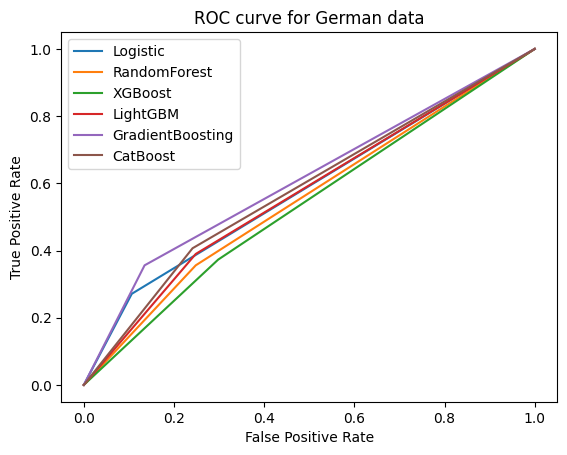

In [38]:
plot_roc_curve(binary_german_test, y_german_t, 'ROC curve for German data')

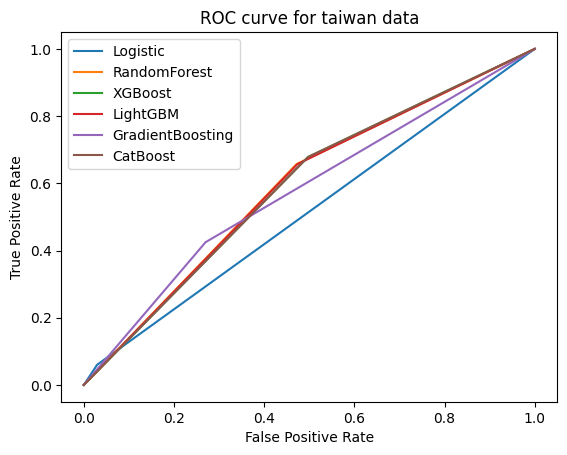

In [ ]:
plot_roc_curve(binary_taiwan_test, y_taiwan_t, 'ROC curve for taiwan data')

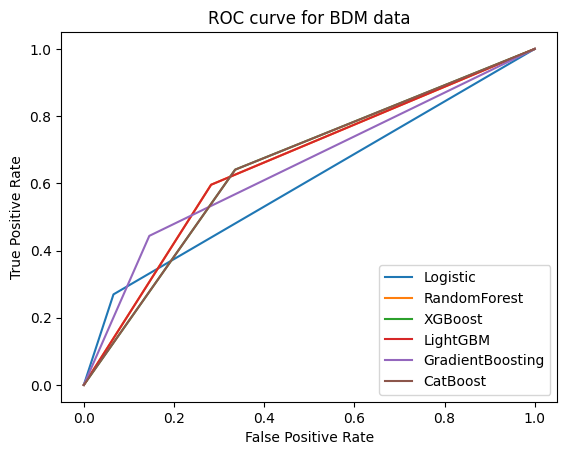

In [ ]:
plot_roc_curve(binary_BDM_test, y_BDM_t, 'ROC curve for BDM data')

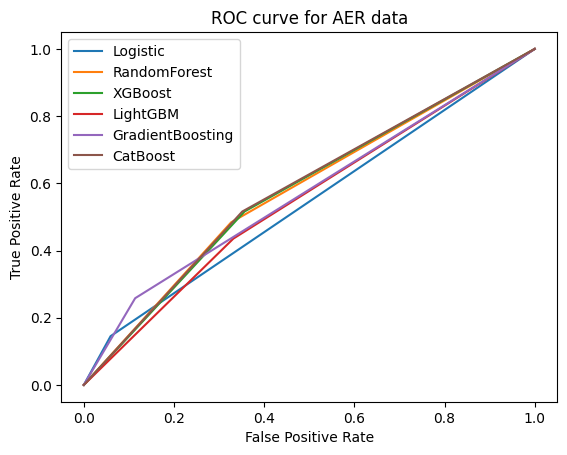

In [ ]:
plot_roc_curve(binary_AER_test, y_AER_t, 'ROC curve for AER data')

#### Cofusion matrix

In [39]:
model_names = ['Logistic', 'RandomForest', 'XGBoost', 'LightGBM', 'GradientBoosting', 'CatBoost']

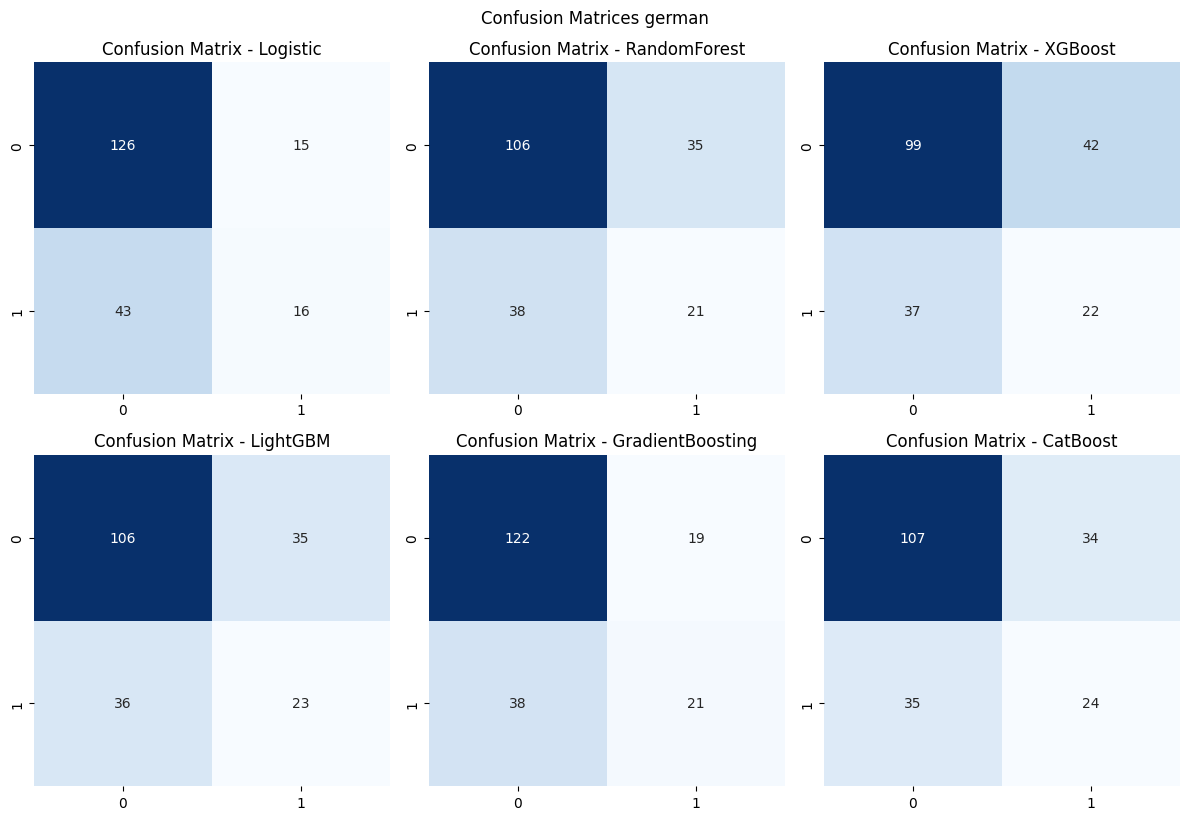

In [40]:
plot_confusion_matrices(model_names, binary_german_test, y_german_t,  title="Confusion Matrices german")

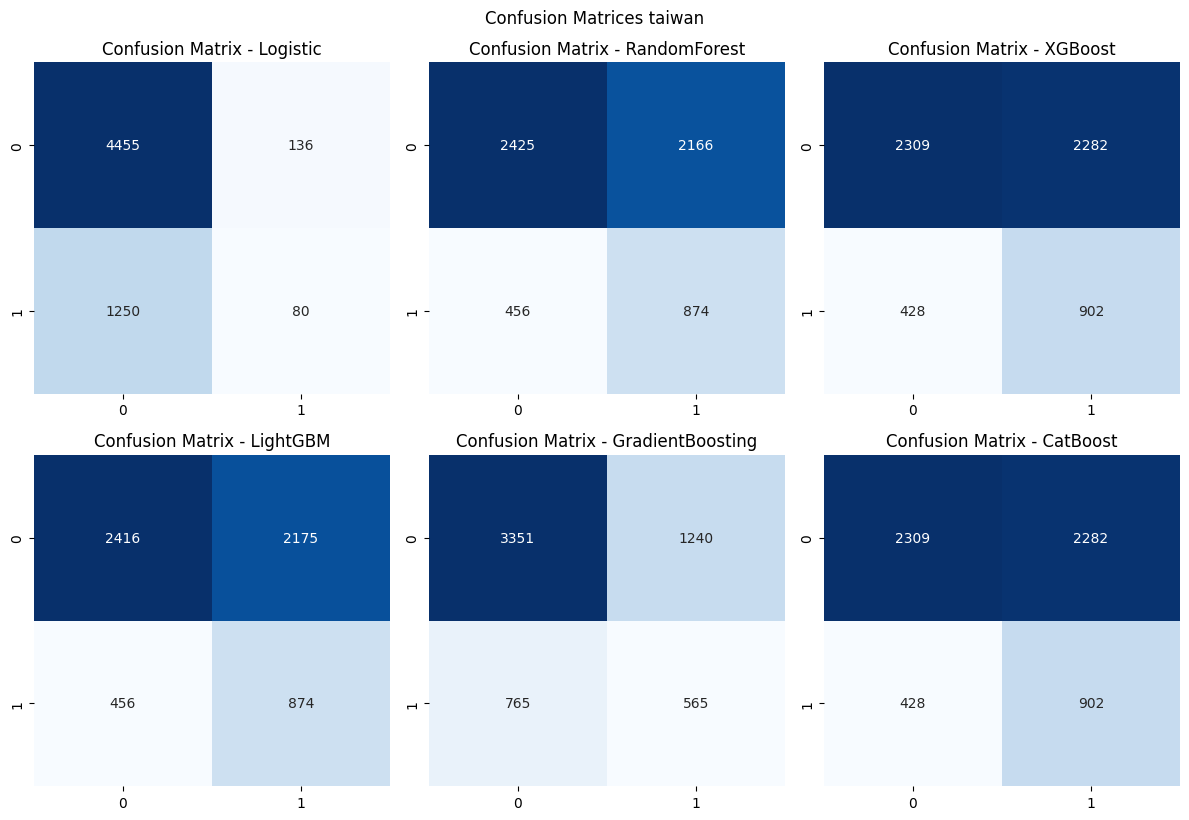

In [ ]:
plot_confusion_matrices(model_names, binary_taiwan_test, y_taiwan_t,  title="Confusion Matrices taiwan")

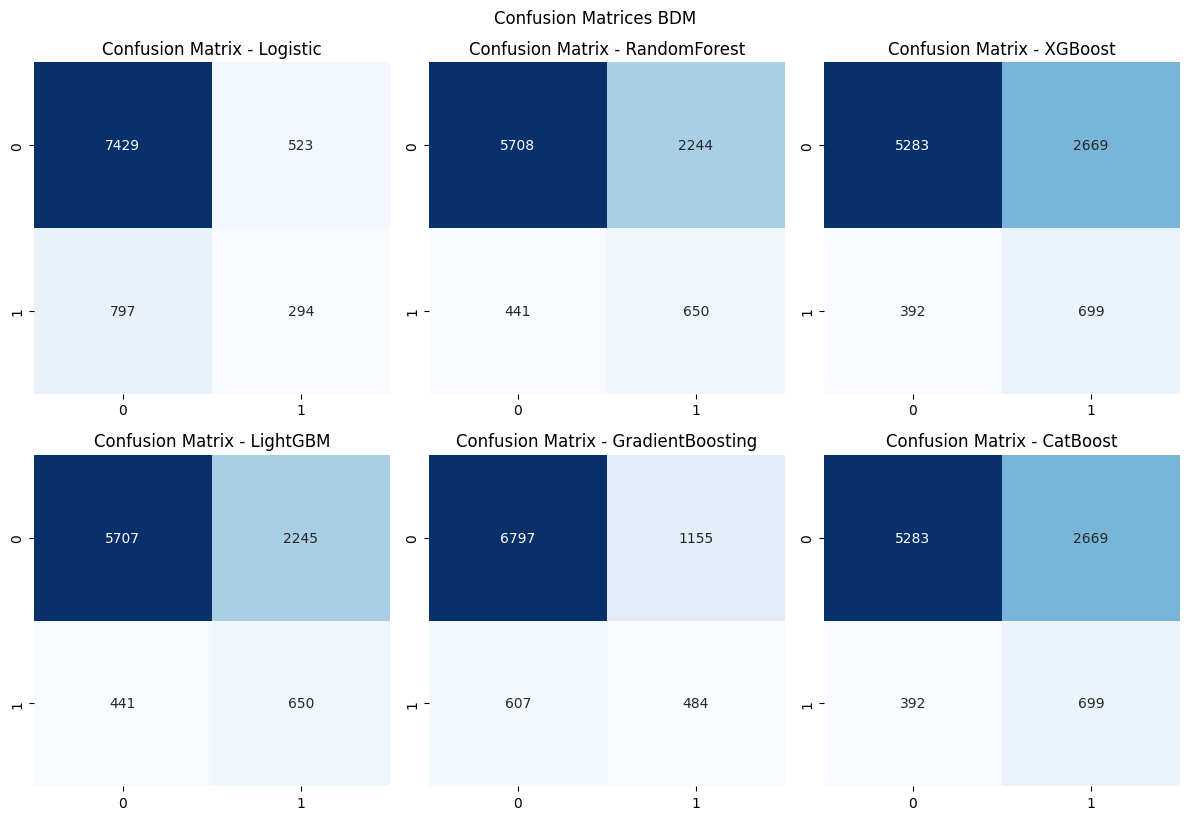

In [ ]:
plot_confusion_matrices(model_names, binary_BDM_test, y_BDM_t,  title="Confusion Matrices BDM")

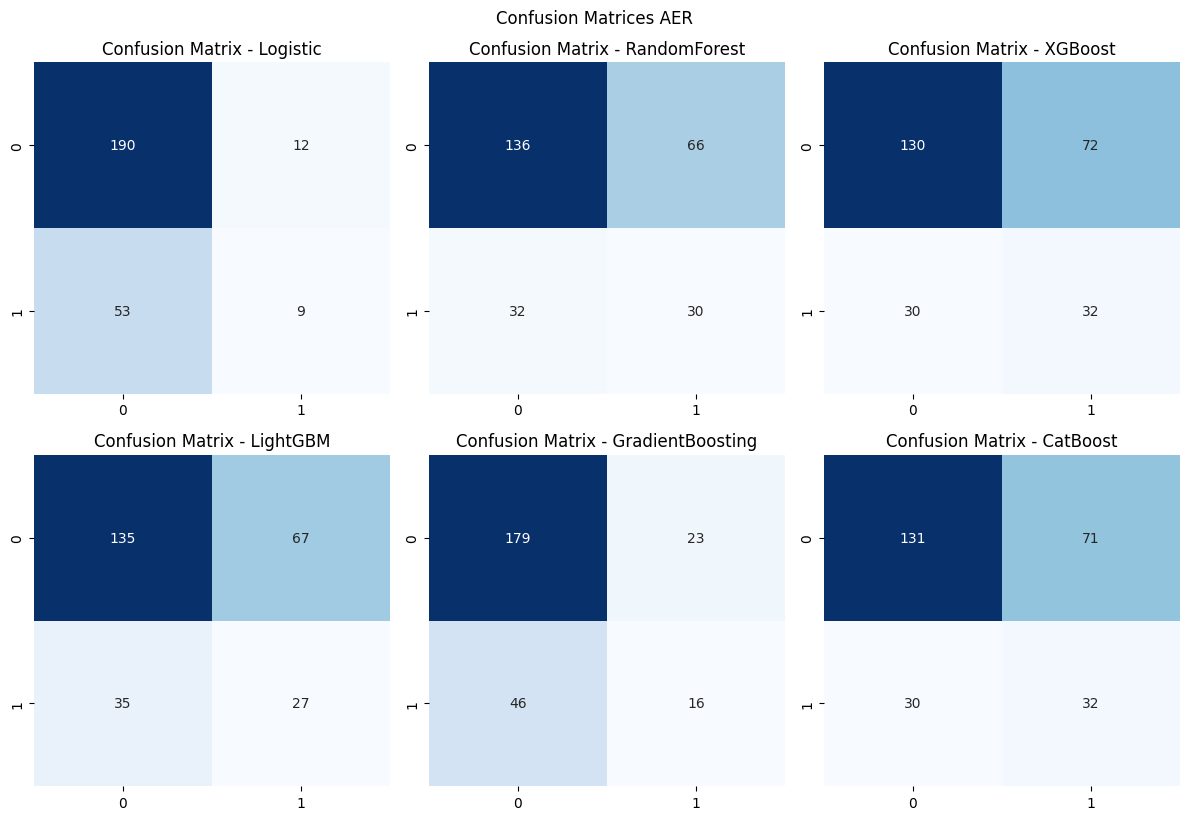

In [ ]:
plot_confusion_matrices(model_names, binary_AER_test, y_AER_t,  title="Confusion Matrices AER")

# Scorecard

## ODDS transform

In [41]:
odds_german_test = transform_to_odds(evaluation_german_test)
odds_taiwan_test = transform_to_odds(evaluation_taiwan_test)
odds_BDM_test = transform_to_odds(evaluation_BDM_test)
odds_AER_test = transform_to_odds(evaluation_AER_test)

## Scaling Score

###Min-Max

In [ ]:
score_german_test = min_max_scaling(odds_german_test)
score_taiwan_test = min_max_scaling(odds_taiwan_test)
score_BDM_test = min_max_scaling(odds_BDM_test)
score_AER_test = min_max_scaling(odds_AER_test)

### Lineare function

In [45]:
offset = 400
factor = 50 / np.log(2)

In [47]:
score_german_ = transform_dataframe(odds_german_test, offset, factor)
score_taiwan_ = transform_dataframe(odds_taiwan_test, offset, factor)
score_BDM_ = transform_dataframe(odds_BDM_test, offset, factor)
score_AER_ = transform_dataframe(odds_AER_test, offset, factor)

## Plot score

In [48]:
score_plot_german_ = pd.concat([score_german_, y_german_t], axis=1)
score_plot_taiwan_ = pd.concat([score_taiwan_, y_taiwan_t], axis=1)
score_plot_BDM_ = pd.concat([score_BDM_, y_BDM_t], axis=1)
score_plot_AER_ = pd.concat([score_AER_, y_AER_t], axis=1)
model_columns_ = ['Logistic', 'RandomForest', 'XGBoost', 'LightGBM', 'GradientBoosting', 'CatBoost']

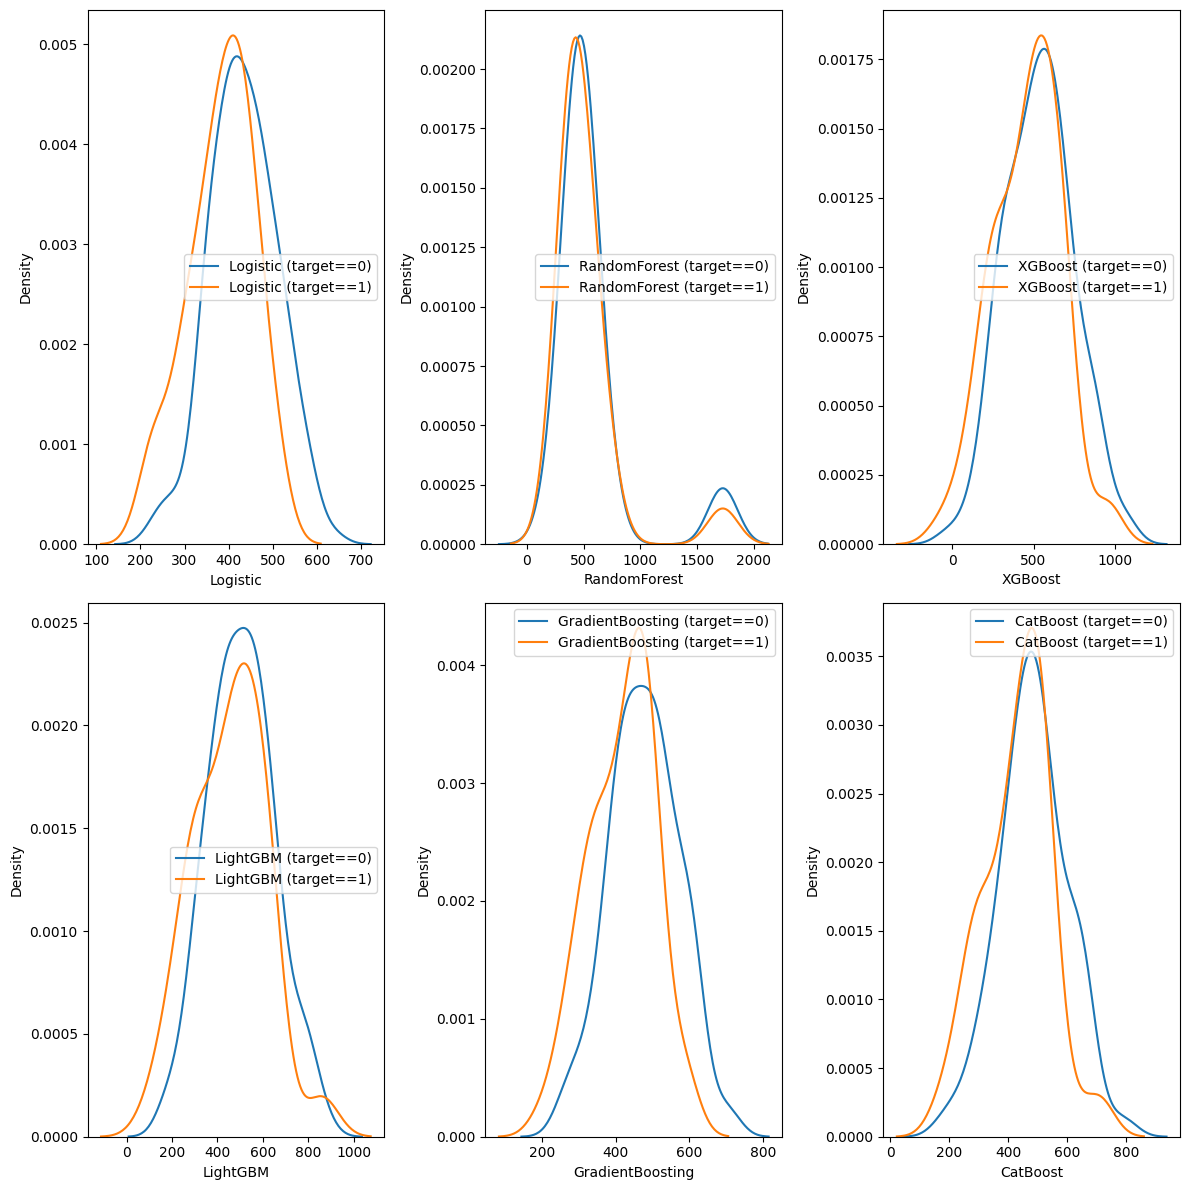

In [50]:
plot_density_subplots(score_plot_german_, model_columns_, 'target', 3)

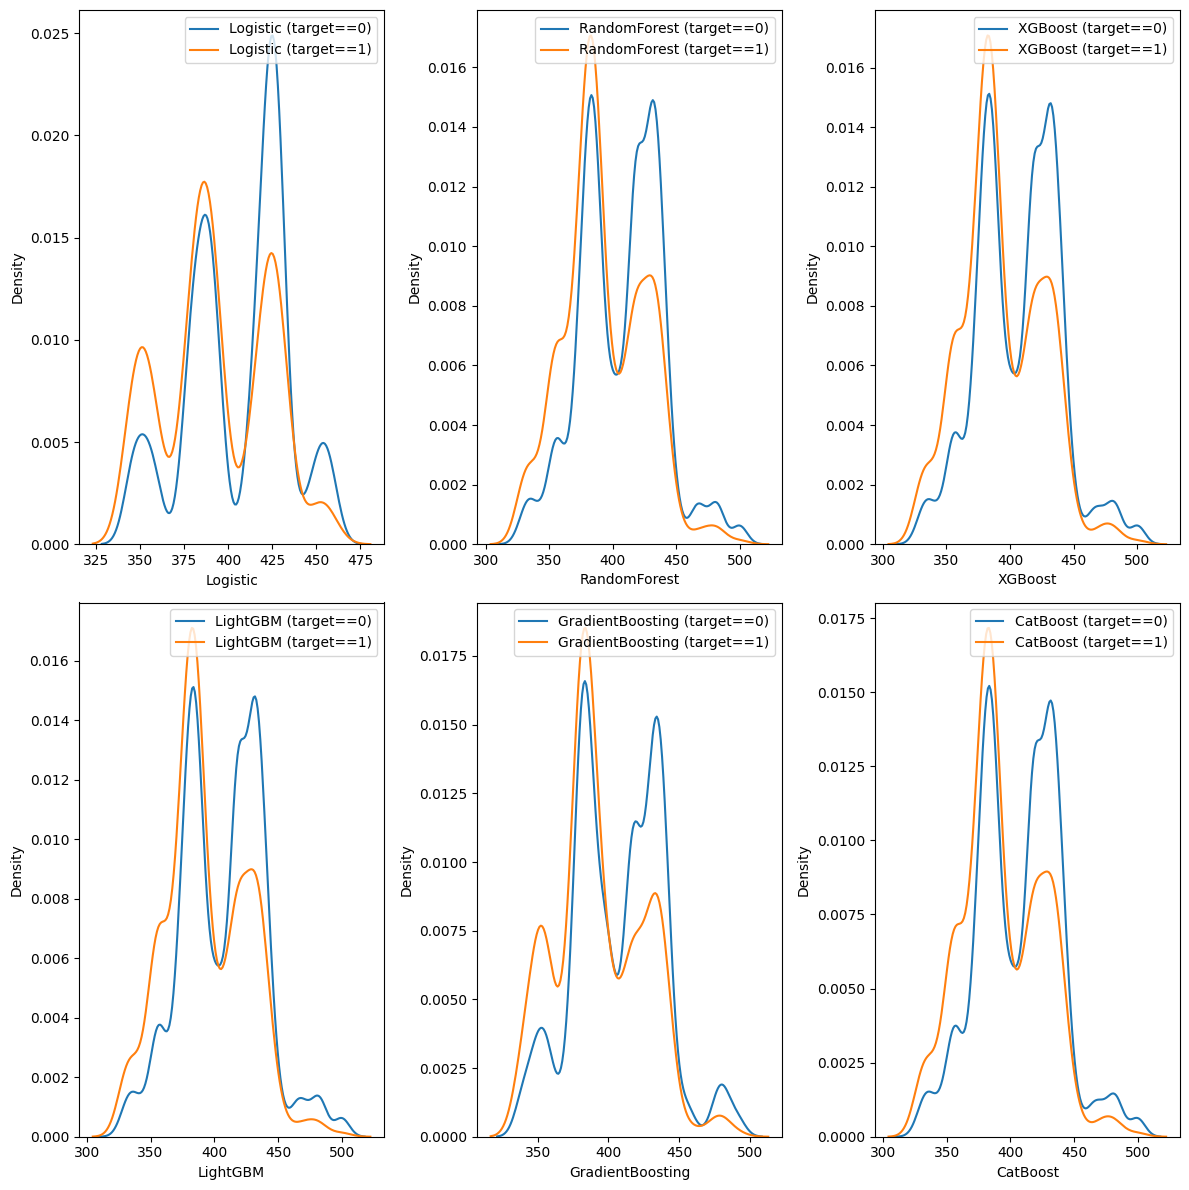

In [51]:
plot_density_subplots(score_plot_taiwan_, model_columns_, 'target', 3)

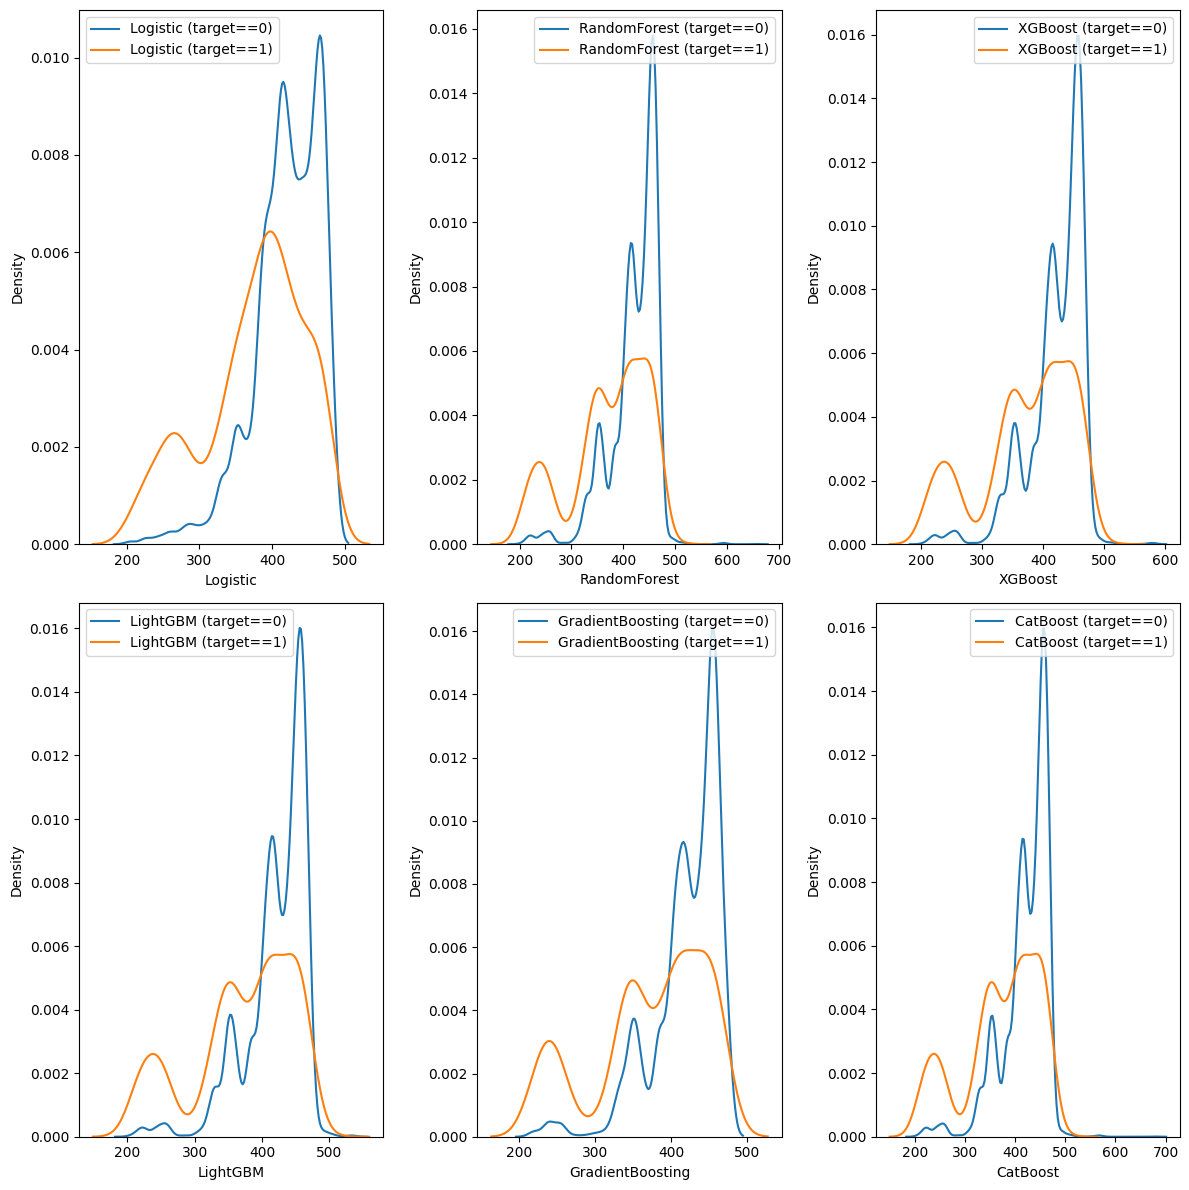

In [52]:
plot_density_subplots(score_plot_BDM_, model_columns_, 'target', 3)

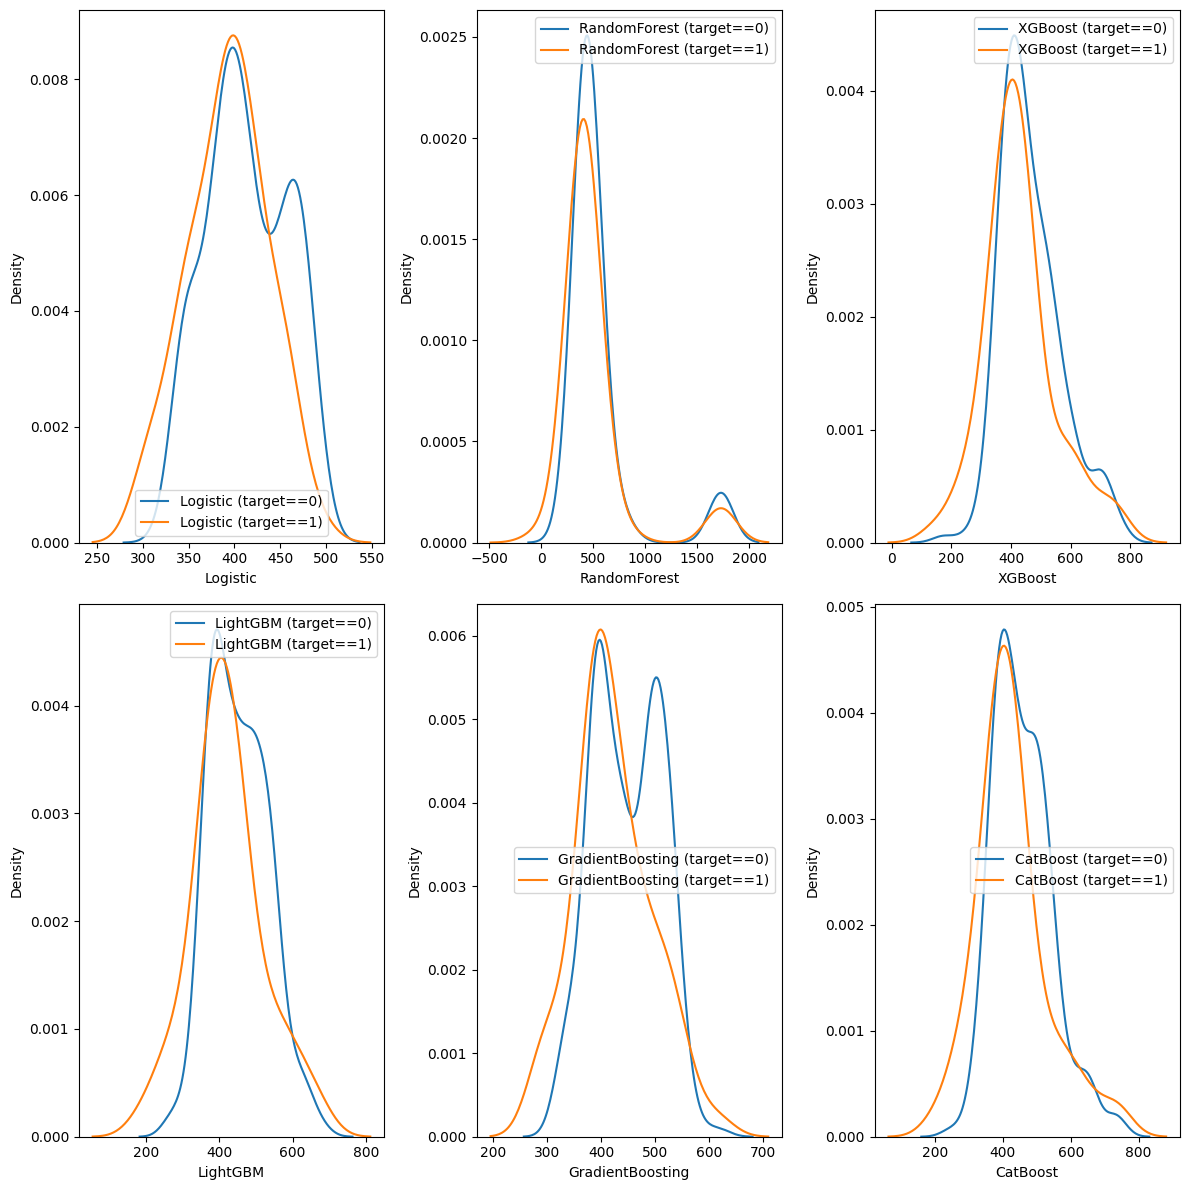

In [53]:
plot_density_subplots(score_plot_AER_, model_columns_, 'target', 3)

In [ ]:
score_plot_german = pd.concat([score_german_test, y_german_t], axis=1)
score_plot_taiwan = pd.concat([score_taiwan_test, y_taiwan_t], axis=1)
score_plot_BDM = pd.concat([score_BDM_test, y_BDM_t], axis=1)
score_plot_AER = pd.concat([score_AER_test, y_AER_t], axis=1)
model_columns = ['Logistic', 'RandomForest', 'XGBoost', 'LightGBM', 'GradientBoosting', 'CatBoost']

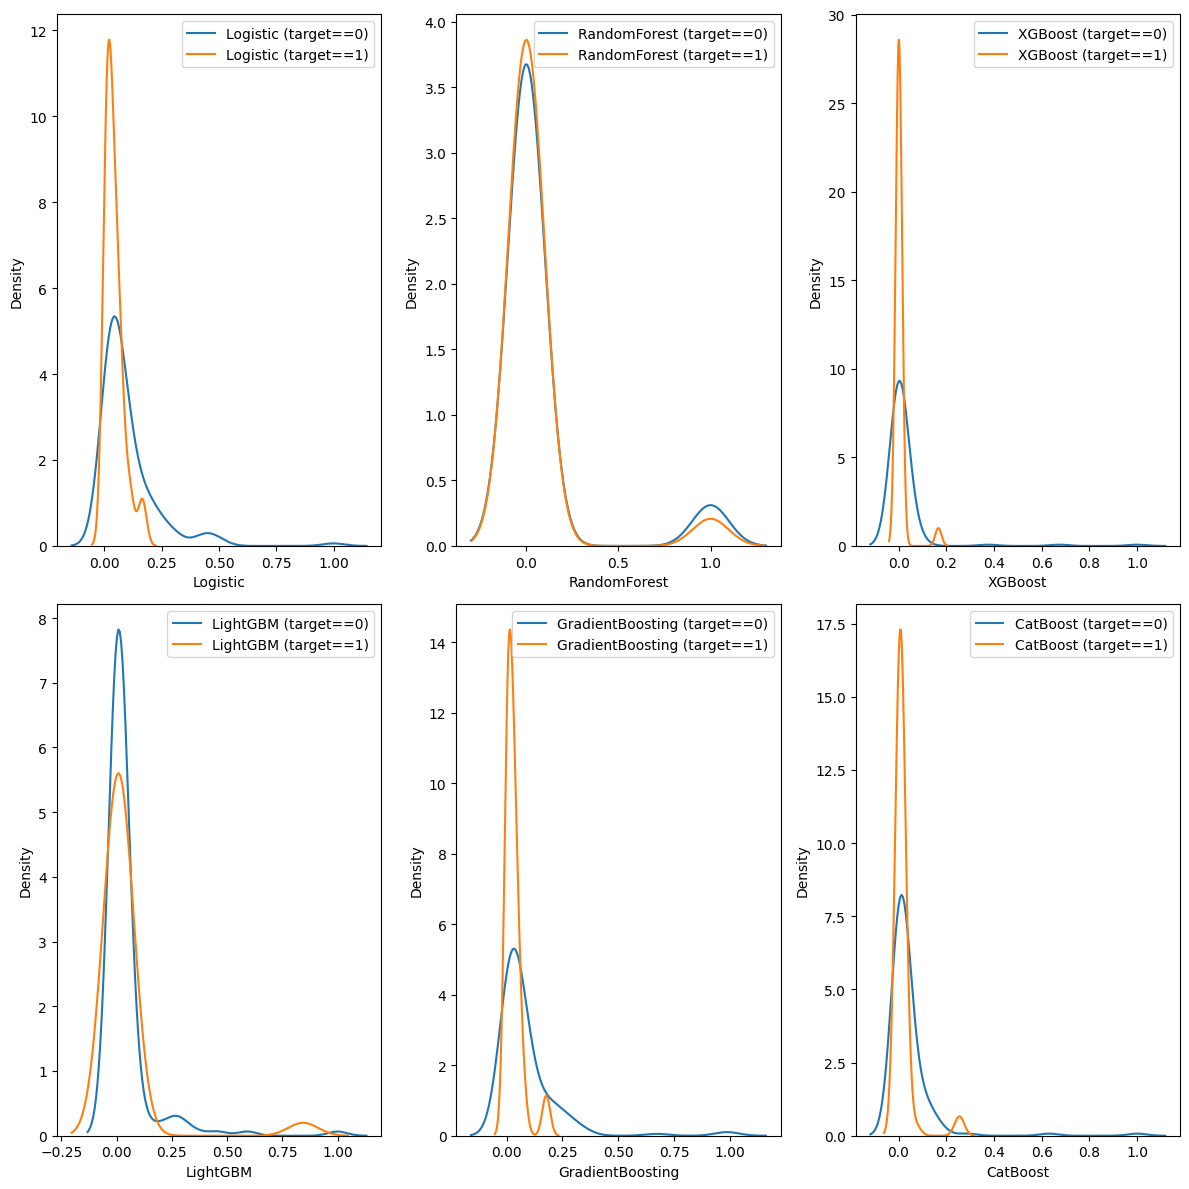

In [ ]:
plot_density_subplots(score_plot_german, model_columns, 'target', 3)

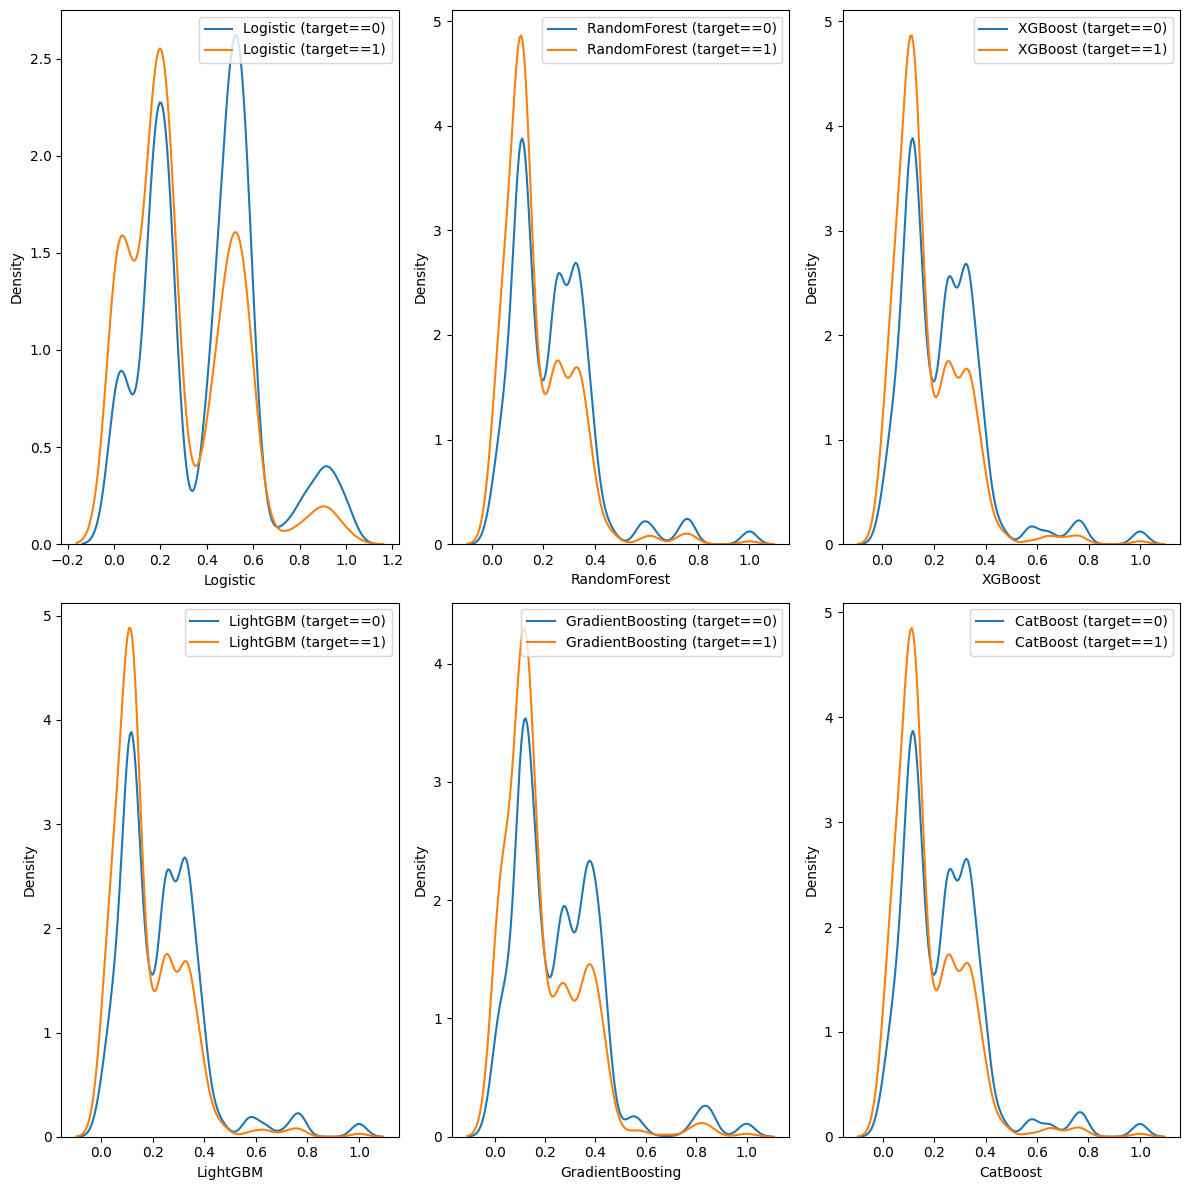

In [ ]:
plot_density_subplots(score_plot_taiwan, model_columns, 'target', 3)

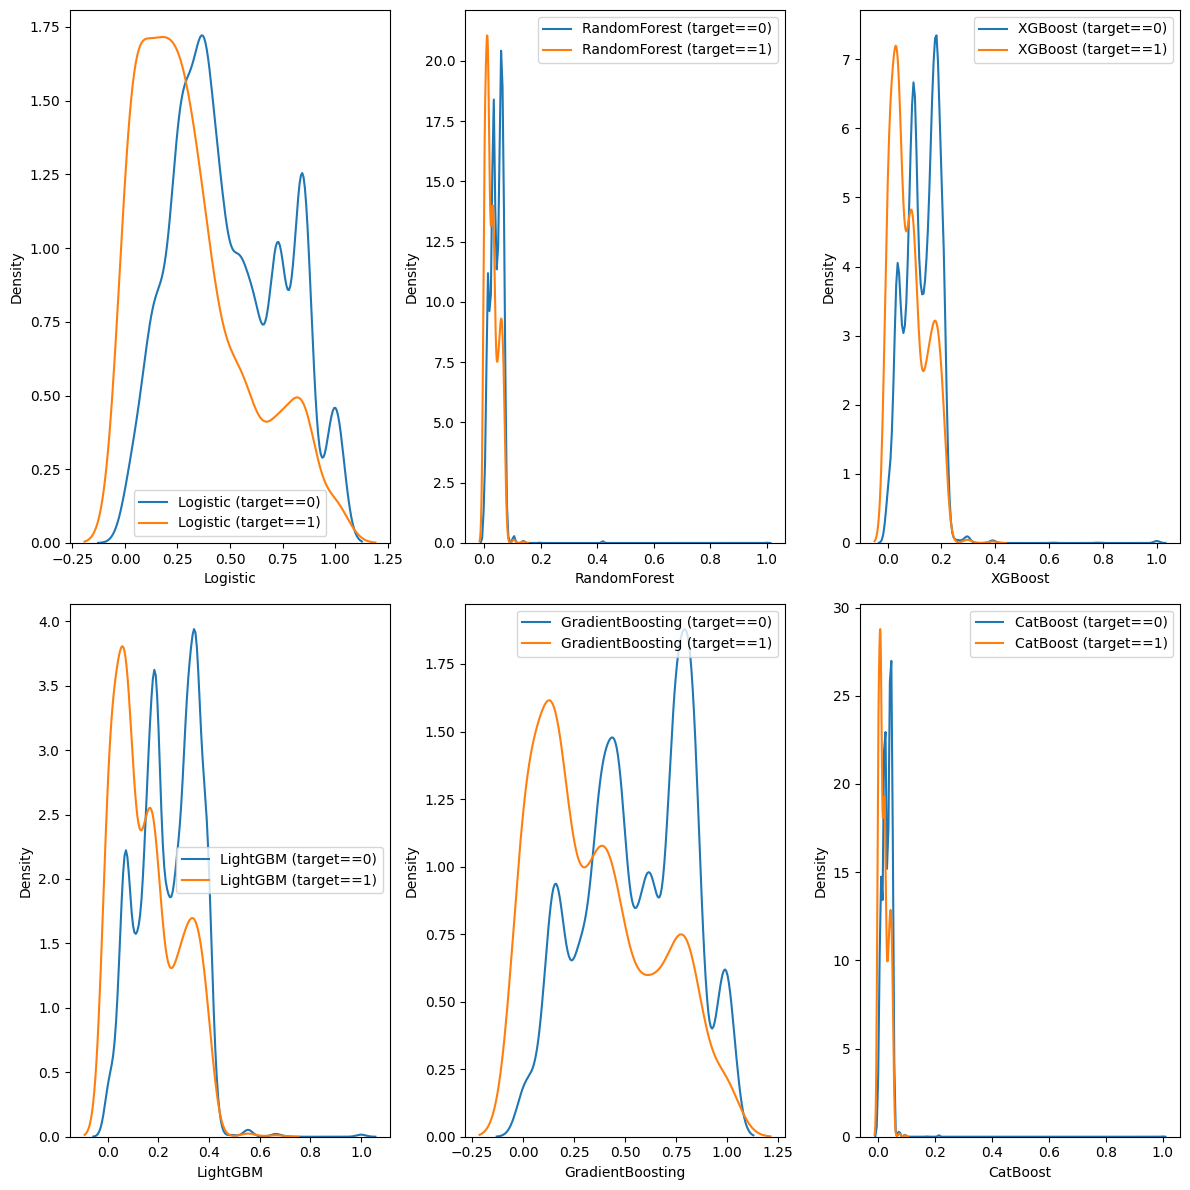

In [ ]:
plot_density_subplots(score_plot_BDM, model_columns, 'target', 3)

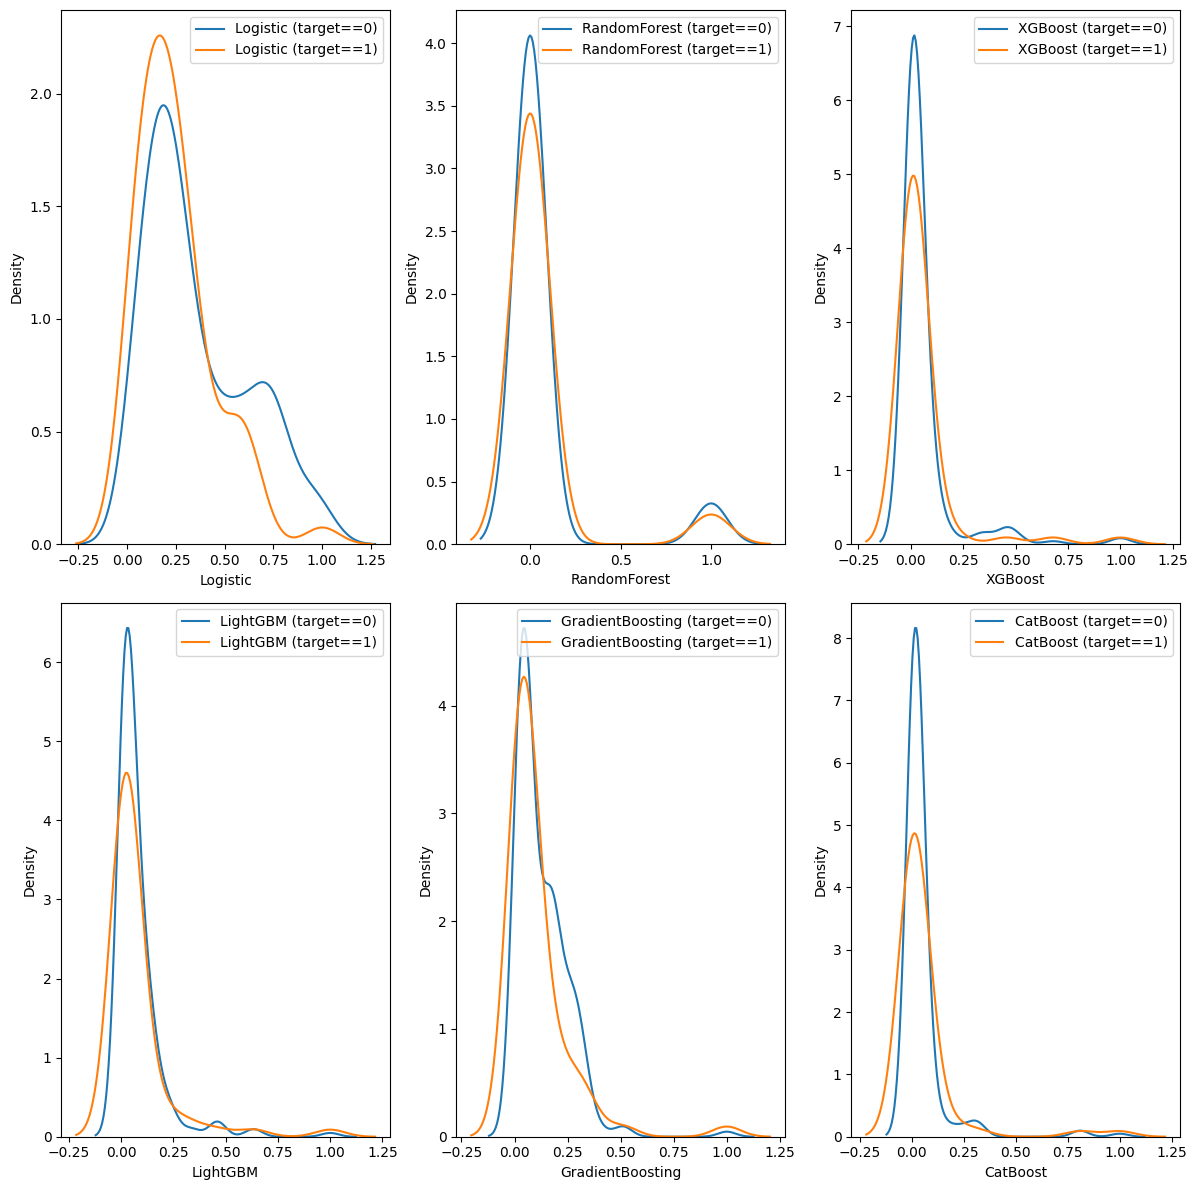

In [ ]:
plot_density_subplots(score_plot_AER, model_columns, 'target', 3)